## Assignment No. 2
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no-2"></a>
<a id="assignment-no.-2"></a>














**Data exploration and enrichment for supervised classification**

*Work made by the group 23*:

    Diana Pereira up202304476

    Gonçalo Almas up202303768

    Maria Mota up202306707


## Table of contents
<a id="table-of-contents"></a>

1. [Introduction](#introduction)
2. [Libraries](#libraries)
3. [Load the data set](#load-the-data-set)
4. [Data Exploration](#data-exploration)
- [Feature types](#feature-types)
- [Number of features](#number-of-features)
- [Class distribution](#class-distribution)
- [Values per attribute](#values-per-attribute)
- [Missing values](#missing-values)
- [Outliers](#outliers)
5. [Teste 1](#teste1)
6. [Teste 2](#teste2)
7. [Teste 3](#teste3)
8. [Teste 4](#teste4)
9. [Teste 5](#teste5)
10. [Teste 6](#teste6)
11. [Conclusion](#conclusion)


## Introduction
<a id="introduction"></a>

[[ go back to the top ]](#Table-of-contents)

Hepatocellular carcinoma (HCC) is one of the most common types of liver cancer and represents a significant global health concern. It usually occurs in patients with long-term liver disease and cirrhosis, with hepatitis B and C infections, alcohol abuse, and metabolic syndrome as common risk factors. The prognosis for HCC patients varies widely, highlighting the importance of early detection and proper treatment in increasing survival rates.

In order to have a deeper insight into and predict the outcomes for HCC patients, we rely on data science. The HCC dataset, gathered at the Coimbra Hospital and University Center (CHUC) in Portugal, provides a valuable resource for this aim. This set of data contains clinical information from 165 patients who have been diagnosed with HCC.

It includes 50 features selected based on the European Association for the Study of the Liver - European Organisation for Research and Treatment of Cancer (EASL-EORTC) Clinical Practice Guidelines for managing HCC. These features include categorical, integer, and real values, with 23 quantitative variables and 26 qualitative variables, and about 10.22% of the dataset contains missing data.

Our main goal in this project is to develop a machine learning pipeline using Python to forecast the survival of patients one year after diagnosis.

## Libraries
<a id="libraries"></a>

[[ go back to the top ]](#Table-of-contents)

NumPy: Allows you to perform a wide variety of mathematical operations on arrays.

Pandas: Makes it easy to work with data structures more efficiently.

Scikit-learn: Provides simple and efficient tools for data mining and data analysis.

Matplotlib: Used to produce graphs and data visualization.

Seaborn: Gives you a high-level interface for drawing attractive and informative statistical graphics, working simultaneously with matplotlib.

In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to show plots inside of the notebook
%matplotlib inline     
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer





## Load the data set
<a id="load-the-data-set"></a>

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [607]:
df = pd.read_csv("hcc_dataset.csv", sep = ',')

#Correcting column names by removing extra spaces
df.columns = df.columns.str.strip()

df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


NOTE: It is important to use the **strip function** since in this data set some features like Albumin appears as ' Albumin', allowing for a correct analysis of the dataset

## Data Exploration
<a id="data-exploration"></a>

[[ go back to the top ]](#Table-of-contents)

### Feature types
<a id="feature-types"></a>

In [608]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

### Number of features/records
<a id="number-of-features"></a>

[[ go back to the top ]](#Table-of-contents)

In [609]:
shape = df.shape

print(f'Patients(rows): {shape[0]}')
print(f'Features(columns): {shape[1]}')

Patients(rows): 165
Features(columns): 50


### Class distribution
<a id="class-distribution"></a>

[[ go back to the top ]](#Table-of-contents)

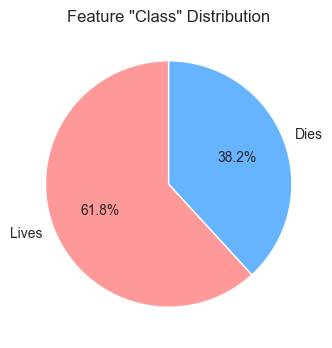

In [610]:
class_counts = df['Class'].value_counts()

# Creating a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Feature "Class" Distribution')
plt.show()

After a first look into our dataset, we can see that some inputs of numerical features are being treated as type objects. This is due to the fact that they are being read as strings. We need to fix this.

In [611]:

# Identifying the numerical columns
def is_numeric_column(col):
    if col.dtypes == 'object':
        try:
            return col.astype(str).str.isnumeric().any()
        except AttributeError:
            return False
    return False

numerical_columns = df.columns[df.apply(is_numeric_column)] 

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'numerical features: {numerical_features}')

# Convert the string values to numeric values in the numerical columns
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'numerical features after preprocessing: {numerical_features}')

numerical features: ['Age']
numerical features after preprocessing: ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']


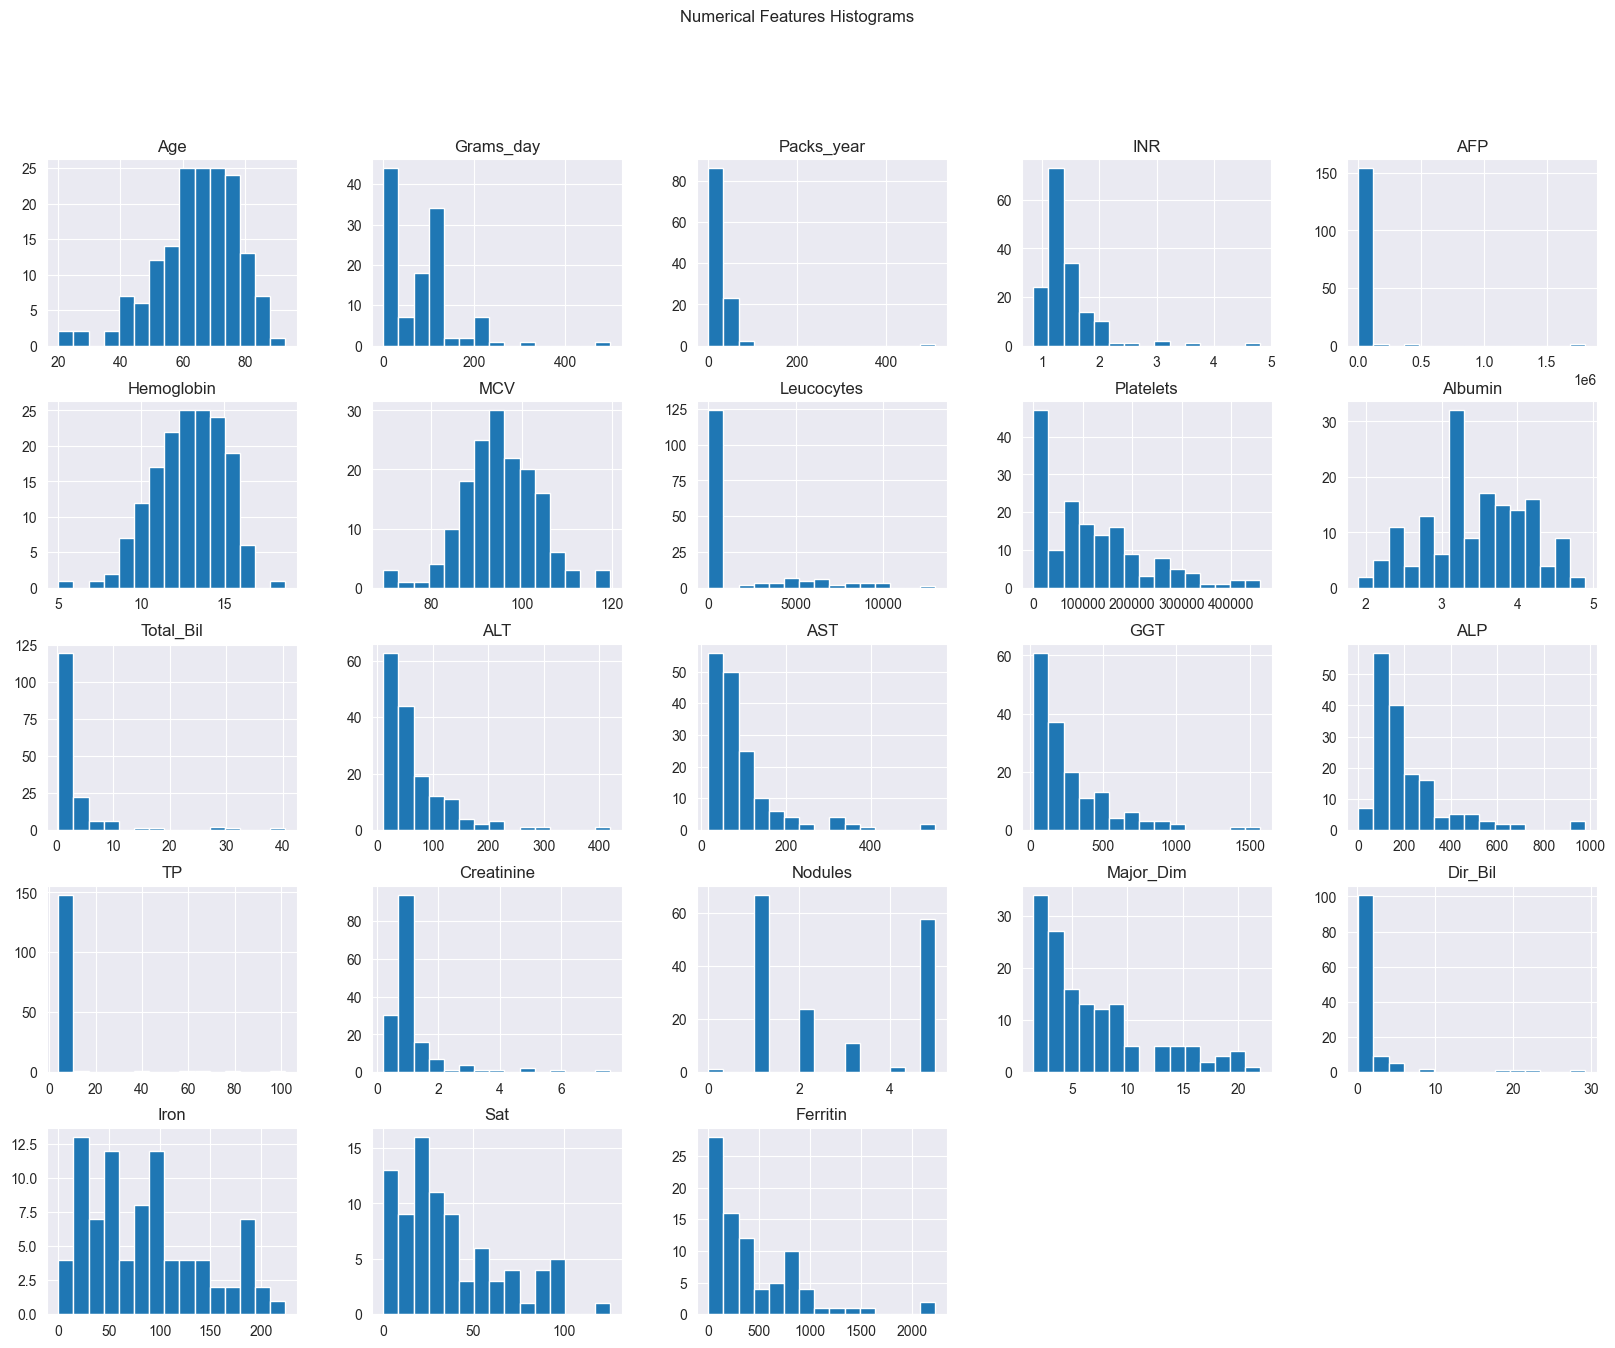

In [612]:
#Numerical Features Histograms
df[numerical_features].hist(figsize=(20,15), bins=15)
plt.suptitle('Numerical Features Histograms')
plt.show()

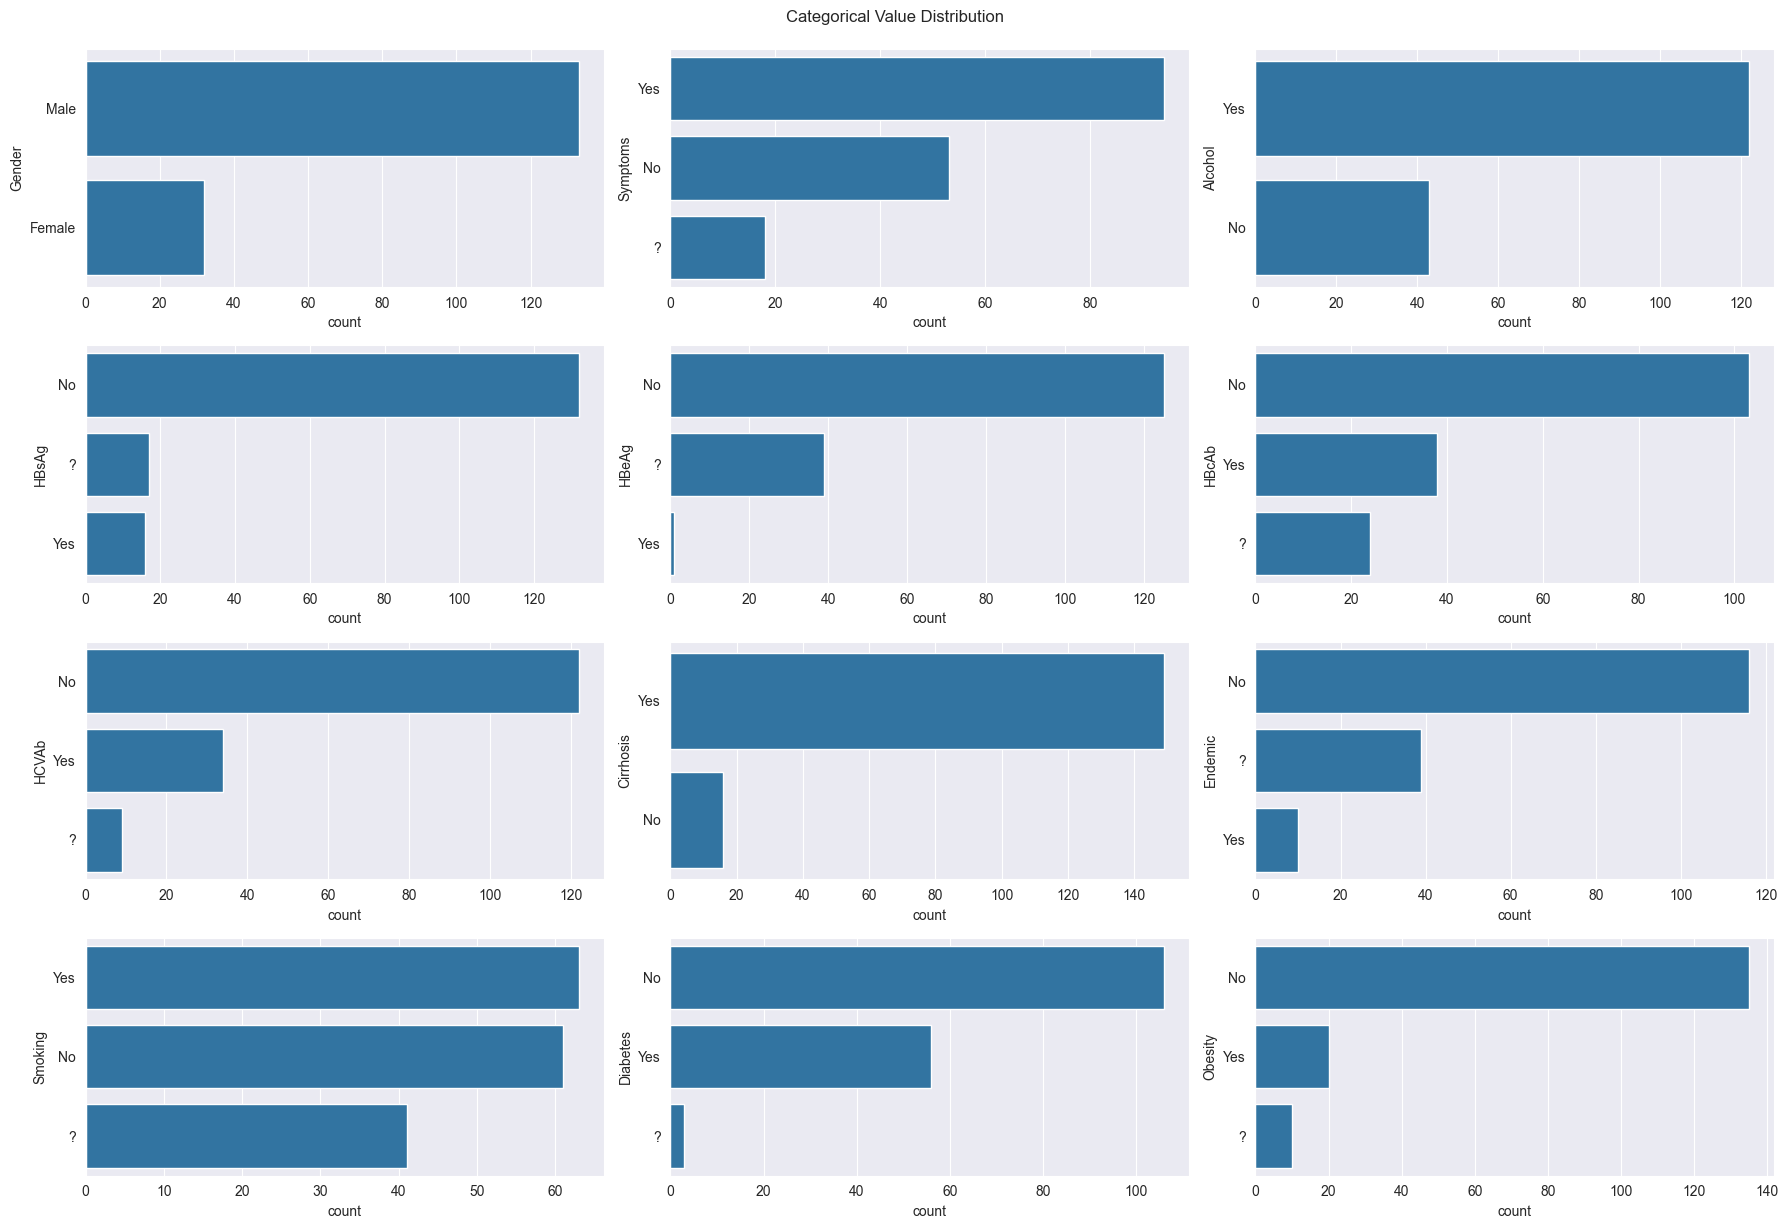

In [613]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(18, 12))  
for col, ax in zip(categorical_features, axes.flatten()):
    sns.countplot(y=col, data=df, ax=ax, order=df[col].value_counts().index)

plt.tight_layout()
plt.suptitle('Categorical Value Distribution', y=1.02)
plt.show()

**->Now our values are already converted to numbers**

### Values per attribute
<a id="values-per-atribute"></a>

[[ go back to the top ]](#Table-of-contents)

In [614]:
#Function to list unique values per column
def list_unique_values(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()
    return unique_values

#List unique values per column
unique_values_per_feature = list_unique_values(df)

#Show unique values per column
for column, values in unique_values_per_feature.items():
    print(f"Unique values in  '{column}':")
    print(values)
    print()

Unique values in  'Gender':
['Male' 'Female']

Unique values in  'Symptoms':
['No' '?' 'Yes']

Unique values in  'Alcohol':
['Yes' 'No']

Unique values in  'HBsAg':
['No' 'Yes' '?']

Unique values in  'HBeAg':
['No' '?' 'Yes']

Unique values in  'HBcAb':
['No' 'Yes' '?']

Unique values in  'HCVAb':
['No' 'Yes' '?']

Unique values in  'Cirrhosis':
['Yes' 'No']

Unique values in  'Endemic':
['No' '?' 'Yes']

Unique values in  'Smoking':
['Yes' '?' 'No']

Unique values in  'Diabetes':
['Yes' 'No' '?']

Unique values in  'Obesity':
['?' 'No' 'Yes']

Unique values in  'Hemochro':
['Yes' 'No' '?']

Unique values in  'AHT':
['No' 'Yes' '?']

Unique values in  'CRI':
['No' 'Yes' '?']

Unique values in  'HIV':
['No' '?' 'Yes']

Unique values in  'NASH':
['No' '?' 'Yes']

Unique values in  'Varices':
['Yes' 'No' '?']

Unique values in  'Spleno':
['No' 'Yes' '?']

Unique values in  'PHT':
['No' 'Yes' '?']

Unique values in  'PVT':
['No' 'Yes' '?']

Unique values in  'Metastasis':
['No' 'Yes' '?']

Some of the 'None' inputs were being incorrectly assumed as np.NaN. We don't want that

In [615]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Replace NaN values with 'None' in the categorical columns
for column in categorical_features:
    df[column] = df[column].fillna('None')

### Missing values
<a id="missing-values"></a>

[[ go back to the top ]](#Table-of-contents)

In [616]:
# Replacing '?' with NaN directly in the DataFrame
df.replace('?', np.nan, inplace=True)
# Checking for null values
null_counts = df.isnull().sum()
print(null_counts)
missing_values_count = df.isnull().sum().sum()

print(f"Total of missing values in the data set: {missing_values_count}")

# Define a threshold
threshold = 0.30 # This means we are considering columns with less than 30% missing values

# Get the columns with missing value rate lower than threshold
good_columns = df.columns[df.isnull().mean() < threshold]

print(f"Columns with less than {threshold*100}% missing values: {good_columns.tolist()}")
print(len(good_columns))

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
Albumin            6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

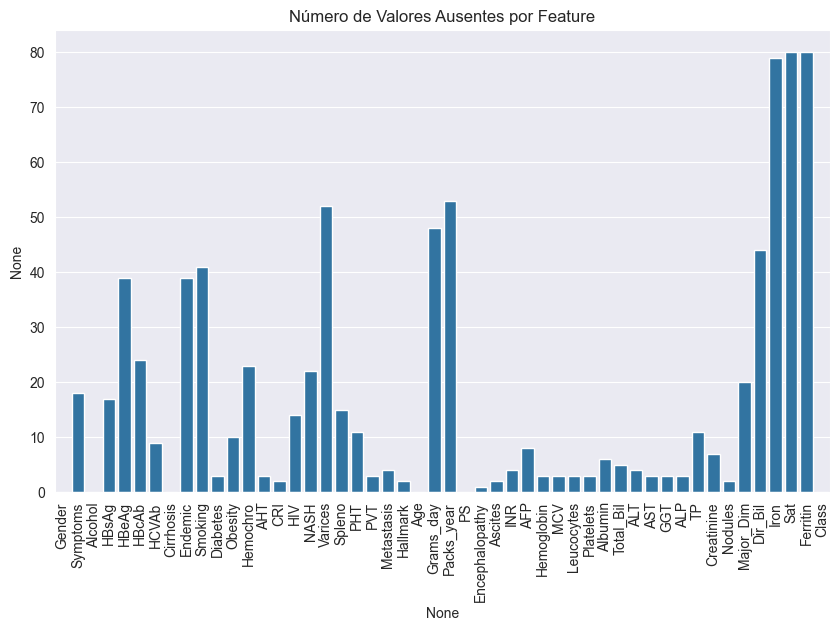

In [617]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=90)  
plt.title('Número de Valores Ausentes por Feature')
plt.show()

Now we can start to analyze the data. For studying purposes, we need to transform categorical values into actual numerical features so we can apply machine learning algorithms.

In [618]:
for column in categorical_features:
    print(f"{column}: {df[column].unique()}")
    
# Transform the categorical values into numerical values
print('__________________________')
print()
print("Now with numerical values")
print()
print('__________________________')
df = df.replace({'Yes': 1, 'No': 0})
df['Gender']=df['Gender'].replace({'Female': 1, 'Male': 0})
df['PS']=df['PS'].replace({'Disabled': 0, 'Selfcare': 1, 'Restricted': 2, 'Ambulatory': 3, 'Active': 4})
df['Encephalopathy']=df['Encephalopathy'].replace({'None': 0, 'Grade I/II': 1, 'Grade III/IV': 2})
df['Ascites']=df['Ascites'].replace({'None': 0, 'Mild': 1, 'Moderate/Severe': 2})
df['Class']=df['Class'].replace({'Dies': 0, 'Lives': 1})
for column in categorical_features:
    print(f"{column}: {df[column].unique()}")

Gender: ['Male' 'Female']
Symptoms: ['No' nan 'Yes']
Alcohol: ['Yes' 'No']
HBsAg: ['No' 'Yes' nan]
HBeAg: ['No' nan 'Yes']
HBcAb: ['No' 'Yes' nan]
HCVAb: ['No' 'Yes' nan]
Cirrhosis: ['Yes' 'No']
Endemic: ['No' nan 'Yes']
Smoking: ['Yes' nan 'No']
Diabetes: ['Yes' 'No' nan]
Obesity: [nan 'No' 'Yes']
Hemochro: ['Yes' 'No' nan]
AHT: ['No' 'Yes' nan]
CRI: ['No' 'Yes' nan]
HIV: ['No' nan 'Yes']
NASH: ['No' nan 'Yes']
Varices: ['Yes' 'No' nan]
Spleno: ['No' 'Yes' nan]
PHT: ['No' 'Yes' nan]
PVT: ['No' 'Yes' nan]
Metastasis: ['No' 'Yes' nan]
Hallmark: ['Yes' 'No' nan]
PS: ['Active' 'Ambulatory' 'Restricted' 'Selfcare' 'Disabled']
Encephalopathy: ['None' 'Grade I/II' nan 'Grade III/IV']
Ascites: ['None' 'Mild' 'Moderate/Severe' nan]
Class: ['Lives' 'Dies']
__________________________

Now with numerical values

__________________________
Gender: [0 1]
Symptoms: [ 0. nan  1.]
Alcohol: [1 0]
HBsAg: [ 0.  1. nan]
HBeAg: [ 0. nan  1.]
HBcAb: [ 0.  1. nan]
HCVAb: [ 0.  1. nan]
Cirrhosis: [1 0]
Endemi

C:\Users\galma\AppData\Local\Temp\ipykernel_22980\3176533250.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})
C:\Users\galma\AppData\Local\Temp\ipykernel_22980\3176533250.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female': 1, 'Male': 0})
C:\Users\galma\AppData\Local\Temp\ipykernel_22980\3176533250.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

### Outliers
<a id="outliers"></a>

[[ go back to the top ]](#Table-of-contents)

An outlier is a value that significantly differs from the majority of the data in a data set.

Q1 (first quartile): is the value below which 25% of the data is situated.

Q3 (third quartile): is the value below which 75% of the data is situated.

IQR (Interquartile Range): is the difference between the third and the first quartile (IQR = Q3 - Q1).

To find the outliers, we will use the Interquartile Range (IQR) method. 
Any value below the first quartile (Q1) minus 1.5 times the IQR or above the third quartile (Q3) plus 1.5 times the IQR will be considered an outlier. 
We will identify the outliers in the numerical columns.

In [619]:
# Converting invalid values to NaN
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')

#Check the conversions and basic statistics
data_describe = df[numerical_features].describe()
data_describe

#function to identify outliers using IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#Identifying outliers for each numerical column
outliers_dict = {col: find_outliers(df, col) for col in numerical_features}

#count the number of outliers per column
outliers_count = {col: len(outliers) for col, outliers in outliers_dict.items()}

outliers_count


{'Age': 4,
 'Grams_day': 2,
 'Packs_year': 3,
 'INR': 9,
 'AFP': 31,
 'Hemoglobin': 1,
 'MCV': 6,
 'Leucocytes': 39,
 'Platelets': 2,
 'Albumin': 0,
 'Total_Bil': 16,
 'ALT': 12,
 'AST': 13,
 'GGT': 11,
 'ALP': 11,
 'TP': 9,
 'Creatinine': 17,
 'Nodules': 0,
 'Major_Dim': 7,
 'Dir_Bil': 14,
 'Iron': 0,
 'Sat': 1,
 'Ferritin': 2}

For visual analysis, we chose the 4 features with more evident outliers.

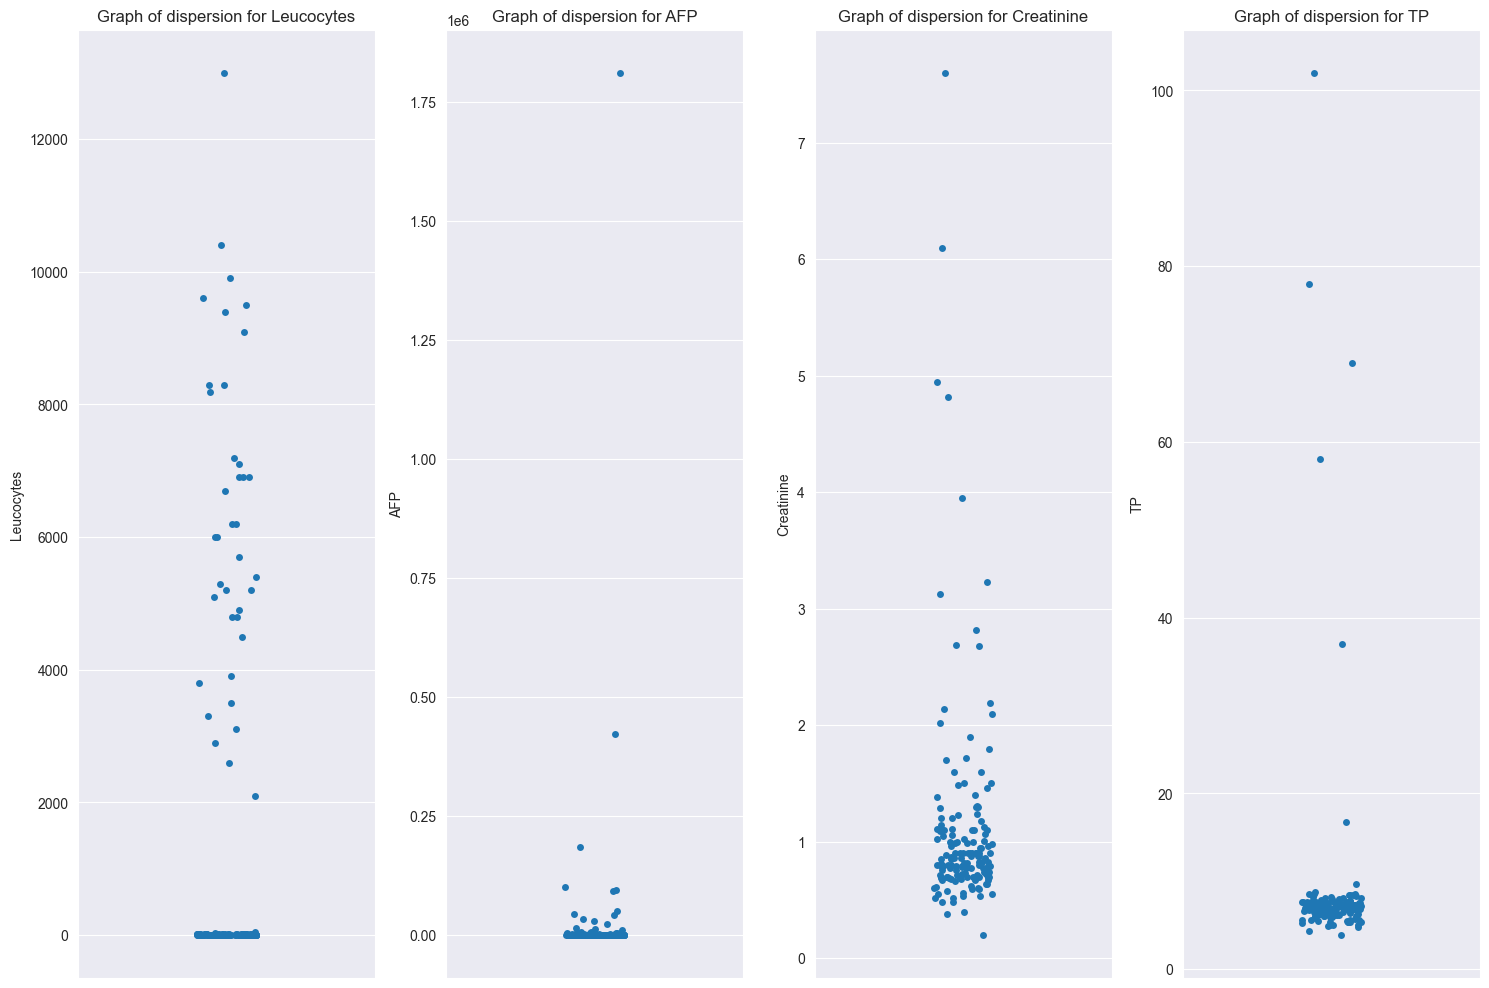

In [620]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(15, 10))

sns.stripplot(y='Leucocytes', data=df, jitter=True, ax=axs[0])
axs[0].set_title('Graph of dispersion for Leucocytes')

sns.stripplot(y='AFP', data=df, jitter=True, ax=axs[1])
axs[1].set_title('Graph of dispersion for AFP')

sns.stripplot(y='Creatinine', data=df, jitter=True, ax=axs[2])
axs[2].set_title('Graph of dispersion for Creatinine')

sns.stripplot(y='TP', data=df, jitter=True, ax=axs[3])
axs[3].set_title('Graph of dispersion for TP')

plt.tight_layout()
plt.show()

**Let's start by printing out some summary statistics about the data set.**

In [621]:
# Calculate summary statistics for numerical features
df.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,165.000000,147.000000,165.000000,148.000000,126.000000,141.000000,156.000000,165.000000,126.000000,124.000000,...,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000,165.000000
mean,0.193939,0.639456,0.739394,0.108108,0.007937,0.269504,0.217949,0.903030,0.079365,0.508065,...,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647,0.618182
std,0.396586,0.481800,0.440302,0.311571,0.089087,0.445284,0.414182,0.296817,0.271387,0.501963,...,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


count: Number of non-null values 

mean: The average value of the colum

std: The standard deviation of the  column

min: The minimum value in column

25%: The value below which 25% of the observations fall (also known as the first quartile)

50%: The median or the value below which 50% of the observations fall (also known as the second quartile)

75%: The value below which 75% of the observations fall (also known as the third quartile)

max: The maximum value in the column.

## 1º test
<a id="teste1"></a>

[[ go back to the top ]](#Table-of-contents)

*Using the original Data set: df, and all the features*

In [622]:


data = df.columns.tolist()
df_1= df.copy()

# Selecting the features and the label
X1 = df_1.drop('Class', axis=1)  # Features
y1 = df_1['Class']  # Label

if df_1.shape[0] > 1:
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
    print(f"Training samples: {X_train1.shape[0]}")
    print(f"Testing samples: {X_test1.shape[0]}")

#we use a 70% split for training and 30% for testing

Training samples: 115
Testing samples: 50


**Decision tree**

In [623]:


tree=DecisionTreeClassifier(random_state=42)

tree.fit(X_train1, y_train1)
# Testing the classifier
y_pred1_dt = tree.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1_dt)
print("Accuracy: ", accuracy1)



scores = cross_val_score(tree, X_train1, y_train1, cv=5)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:  0.58
Cross-Validation Scores:  [0.56521739 0.56521739 0.52173913 0.65217391 0.69565217]
Average Cross-Validation Score:  0.5999999999999999


**Random Forest**

In [624]:


# Create an instance of RandomForestClassifier
rf_good = RandomForestClassifier(n_estimators=100, random_state=42)

# Training our model
rf_good.fit(X_train1, y_train1)

y_pred1_rf = rf_good.predict(X_test1)
accuracy1_rf = (y_test1, y_pred1_rf)
print("Accuracy:", accuracy_score(y_test1, y_pred1_rf))
scores_good = cross_val_score(rf_good, X_train1, y_train1, cv=10)  # cv is the number of folds (k)
print(f"Cross-validation scores: {scores_good}")
print(f"Mean cross-validation score: {scores_good.mean()}")

Accuracy: 0.72
Cross-validation scores: [0.75       0.75       0.83333333 0.75       0.75       0.81818182
 0.54545455 0.72727273 0.81818182 0.72727273]
Mean cross-validation score: 0.746969696969697


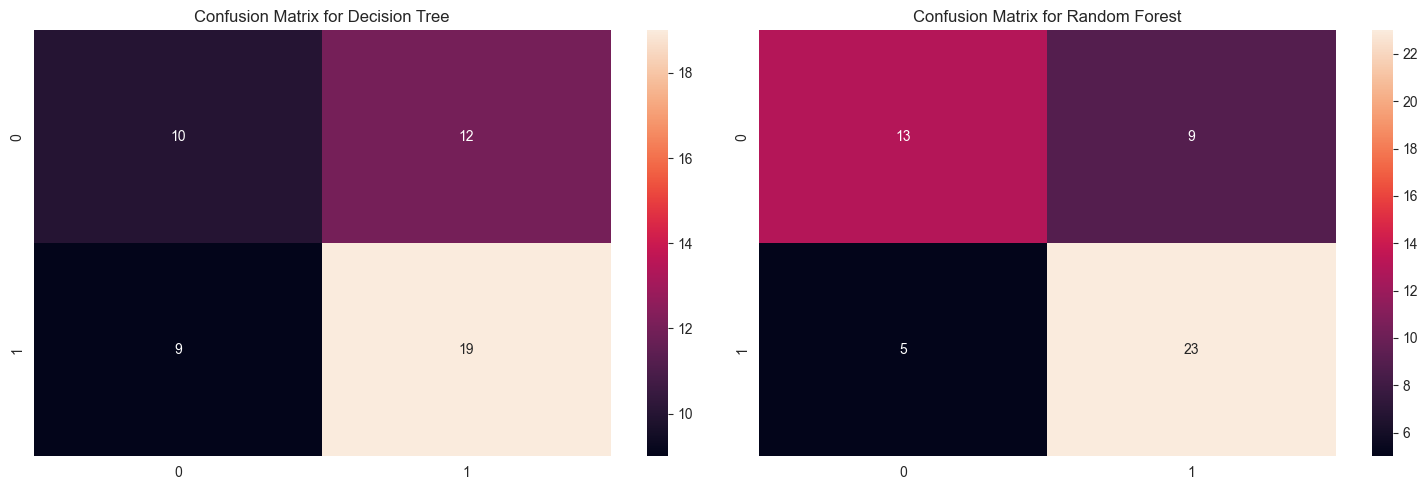

In [625]:

import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix model 1
cm1 = confusion_matrix(y_test1, y_pred1_dt)

#confusion matrix model 2
cm2 = confusion_matrix(y_test1, y_pred1_rf)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()

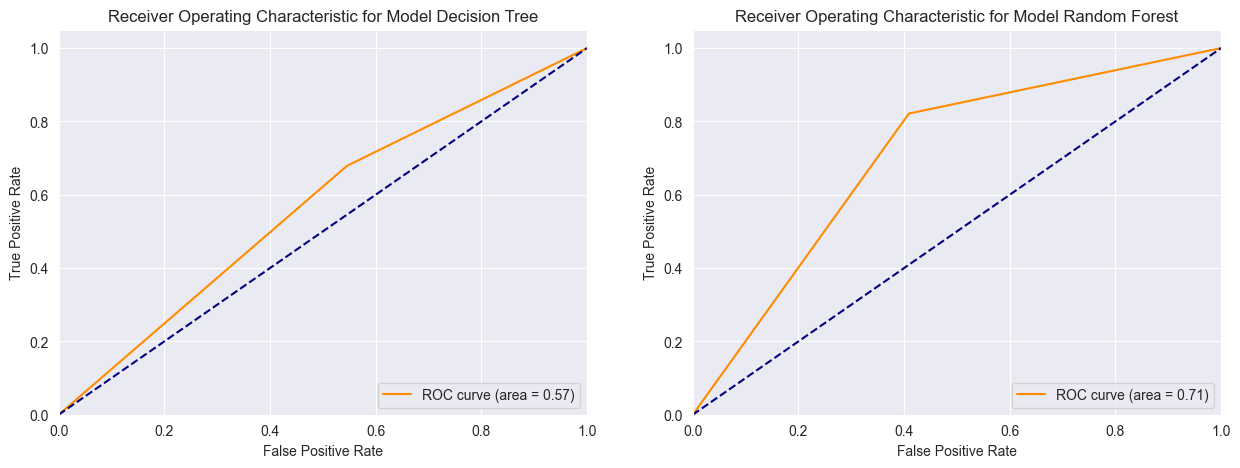

In [626]:


fpr1, tpr1, _ = roc_curve(y_test1, y_pred1_dt)
fpr2, tpr2, _ = roc_curve(y_test1, y_pred1_rf)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver Operating Characteristic for Model Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic for Model Random Forest')
axs[1].legend(loc="lower right")



#### Now test only with the features with less missing values

In [627]:
# Select only the good columns for X
X1_good = df_1[good_columns].drop('Class', axis=1)  # Features
y1_good = df_1['Class']  # Label

# Split the data into training and testing sets
X_train1_good, X_test1_good, y_train1_good, y_test1_good = train_test_split(X1_good, y1_good, test_size=0.3, random_state=42)


**Decision Tree**

In [628]:
tree.fit(X_train1_good, y_train1_good)

# Testing the classifier
y_pred_good_dt = tree.predict(X_test1_good)
accuracy_good_dt = accuracy_score(y_test1, y_pred_good_dt)
print("Accuracy: ", accuracy_good_dt)



scores = cross_val_score(tree, X_train1_good, y_train1_good, cv=10)  # cv is the number of folds (k)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:  0.7
Cross-Validation Scores:  [0.66666667 0.83333333 0.66666667 0.91666667 0.66666667 0.54545455
 0.81818182 0.72727273 0.81818182 0.72727273]
Average Cross-Validation Score:  0.7386363636363635


**Random Forest**

In [629]:
# Train the model using the training sets
rf_good.fit(X_train1_good, y_train1_good)

# Predict the response for test dataset
y_pred_good_rf = rf_good.predict(X_test1_good)
# Model Accuracy
accuracy1_good_rf = accuracy_score(y_test1_good, y_pred_good_rf)
print(f"Accuracy: {accuracy1_good_rf}")

scores_good = cross_val_score(rf_good, X_train1_good, y_train1_good, cv=10)  # cv is the number of folds (k)
print(f"Cross-validation scores: {scores_good}")
print(f"Mean cross-validation score: {scores_good.mean()}")

Accuracy: 0.74
Cross-validation scores: [0.75       0.83333333 0.75       0.58333333 0.58333333 0.81818182
 0.90909091 0.72727273 0.90909091 0.63636364]
Mean cross-validation score: 0.7500000000000001


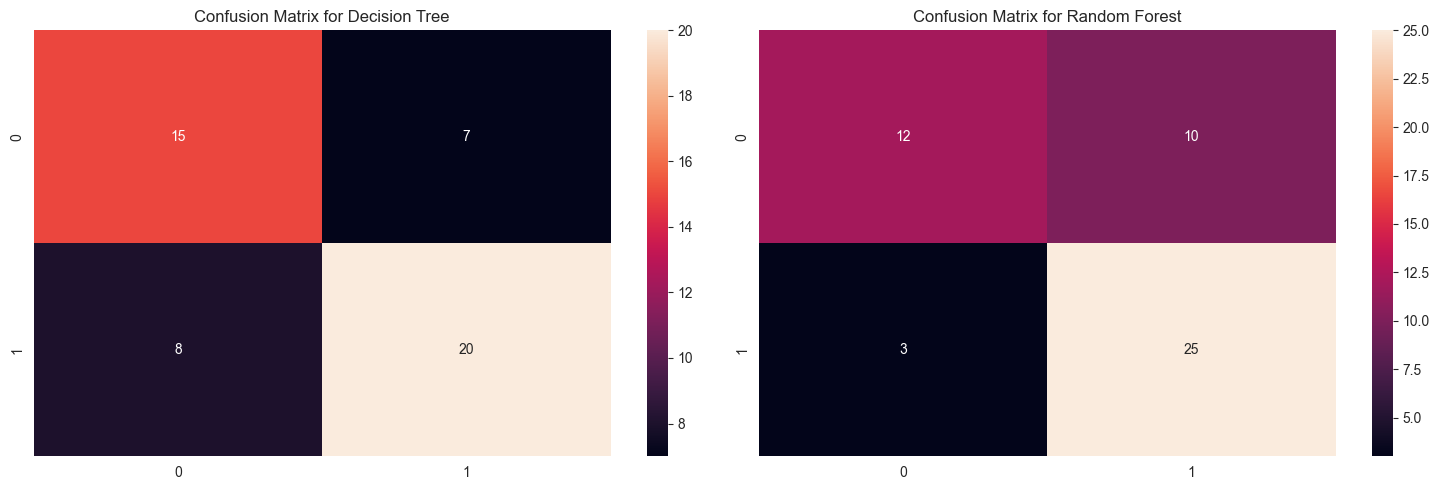

In [630]:

import matplotlib.pyplot as plt
import seaborn as sns




cm1 = confusion_matrix(y_test1_good, y_pred_good_dt)


cm2 = confusion_matrix(y_test1_good, y_pred_good_rf)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')

sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()


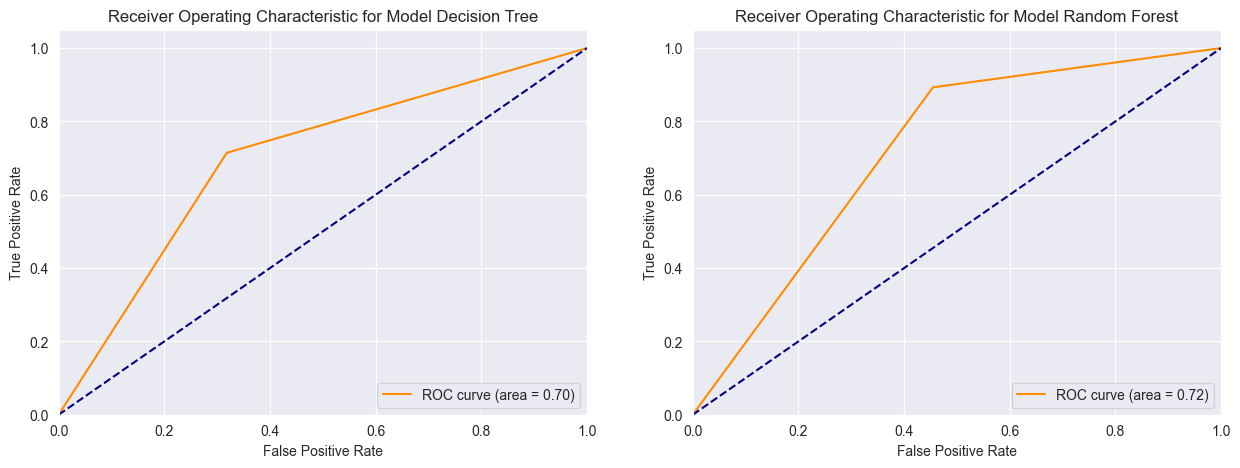

In [631]:



fpr1, tpr1, _ = roc_curve(y_test1_good, y_pred_good_dt)
fpr2, tpr2, _ = roc_curve(y_test1_good, y_pred_good_rf)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Receiver Operating Characteristic for Model Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic for Model Random Forest')
axs[1].legend(loc="lower right")




**Is it worth it to remove columns?**
Looking at the Data, we can see a slight improvement in the cross-validation scores, even though accuracy remains barely the same. Therefore removing the columns with more than 30% of missing values is a good idea.

In [632]:
para_remocao = 30
missing_percent = df.isnull().mean() * 100

colunas_remover = missing_percent[missing_percent > para_remocao].index

print(colunas_remover)
df.drop(columns=colunas_remover, inplace=True)

Index(['Varices', 'Packs_year', 'Iron', 'Sat', 'Ferritin'], dtype='object')



Updating numerical and categorical features!

In [633]:
for i in colunas_remover:
    if i in numerical_features:
        numerical_features.remove(i)
    elif i in categorical_features:
        categorical_features.remove(i)

## 2º test
<a id="teste2"></a>

[[ go back to the top ]](#Table-of-contents)


Note: Dir_Bil is highly related to Total_Bil, so we can test removing one of them

In [634]:
X_drop_feature_dir = df.drop(['Class', 'Dir_Bil'], axis=1)  # remove features
y_drop_feature_dir = df['Class']  # Label

X_train_drop_dir, X_test_drop_dir, y_train_drop_dir, y_test_drop_dir = train_test_split(X_drop_feature_dir, y_drop_feature_dir, test_size=0.3, random_state=42)

**Decision Tree**

In [635]:
tree.fit(X_train_drop_dir, y_train_drop_dir)

# Testing the classifier
y_pred_drop_dt = tree.predict(X_test_drop_dir)
accuracy_drop_dt = accuracy_score(y_test_drop_dir, y_pred_drop_dt)
print("Accuracy: ", accuracy_drop_dt)

scores = cross_val_score(tree, X_train_drop_dir, y_train_drop_dir, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:  0.72
Cross-Validation Scores:  [0.58333333 0.66666667 0.66666667 0.41666667 0.66666667 0.72727273
 0.63636364 0.54545455 0.90909091 0.72727273]
Average Cross-Validation Score:  0.6545454545454545


**Random Forest**

In [636]:
rf_good.fit(X_train_drop_dir, y_train_drop_dir)

y_pred_drop_rf= rf_good.predict(X_test_drop_dir)
accuracy_drop_rf = accuracy_score(y_test_drop_dir, y_pred_drop_rf)
print(f"Accuracy:{accuracy_drop_rf}")

# Perform cross-validation on the KNN model
scores_IQR_good = cross_val_score(rf_good, X_train_drop_dir, y_train_drop_dir, cv=10) 

print(f"Cross-validation scores: {scores_IQR_good}")
print(f"Mean cross-validation score: {scores_IQR_good.mean()}")

Accuracy:0.76
Cross-validation scores: [0.66666667 0.83333333 0.66666667 0.58333333 0.58333333 0.72727273
 0.90909091 0.81818182 0.90909091 0.72727273]
Mean cross-validation score: 0.7424242424242424


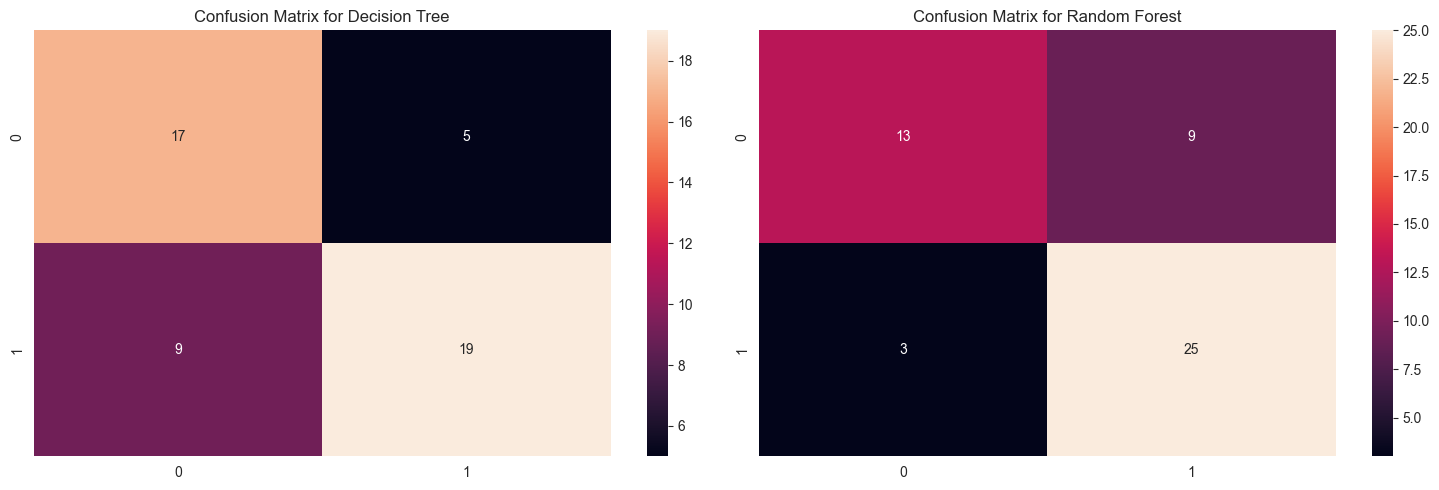

In [637]:

import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test_drop_dir, y_pred_drop_dt)

cm2 = confusion_matrix(y_test_drop_dir, y_pred_drop_rf)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()



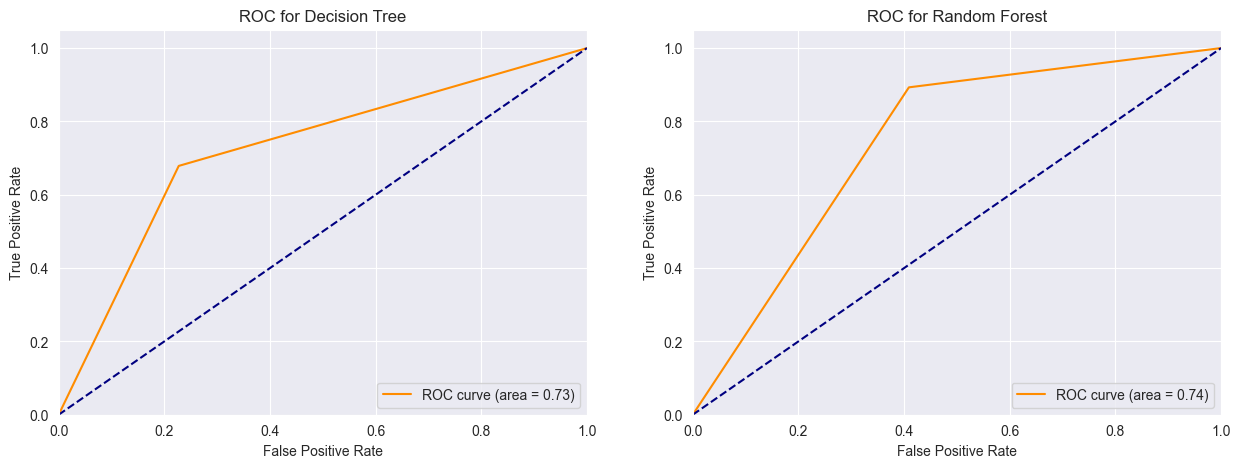

In [638]:



fpr1, tpr1, _ = roc_curve(y_test_drop_dir, y_pred_drop_dt)
fpr2, tpr2, _ = roc_curve(y_test_drop_dir, y_pred_drop_rf)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC for Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC for Random Forest')
axs[1].legend(loc="lower right")





After analysing this data, we conclude that it is good to remove 'Dir_Bil from our dataset

In [639]:
df = df.drop(columns=['Dir_Bil'])
numerical_features.remove('Dir_Bil')
missing_percent = missing_percent.drop('Dir_Bil')

## 3º test
<a id="teste3"></a>

[[ go back to the top ]](#Table-of-contents)

### Imputation of missing values
<a id="imputation"></a>

**Imputation using mode and mean**


When the values have less than 10% missing values, it can be useful to proceed with imputation by mean and mode.

In [640]:


imputacao =10
colunas_imputacao = missing_percent[missing_percent <= imputacao].index
print("\nColunas para imputação:\n", colunas_imputacao)

for column in colunas_imputacao:
    if column in numerical_features:
        df[column].fillna(df[column].mean(), inplace=True)
    if column in categorical_features:
        df[column].fillna(df[column].mode()[0], inplace=True)



Colunas para imputação:
 Index(['Gender', 'Alcohol', 'HCVAb', 'Cirrhosis', 'Diabetes', 'Obesity', 'AHT',
       'CRI', 'HIV', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age',
       'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Class'],
      dtype='object')


C:\Users\galma\AppData\Local\Temp\ipykernel_22980\1567349706.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\galma\AppData\Local\Temp\ipykernel_22980\1567349706.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

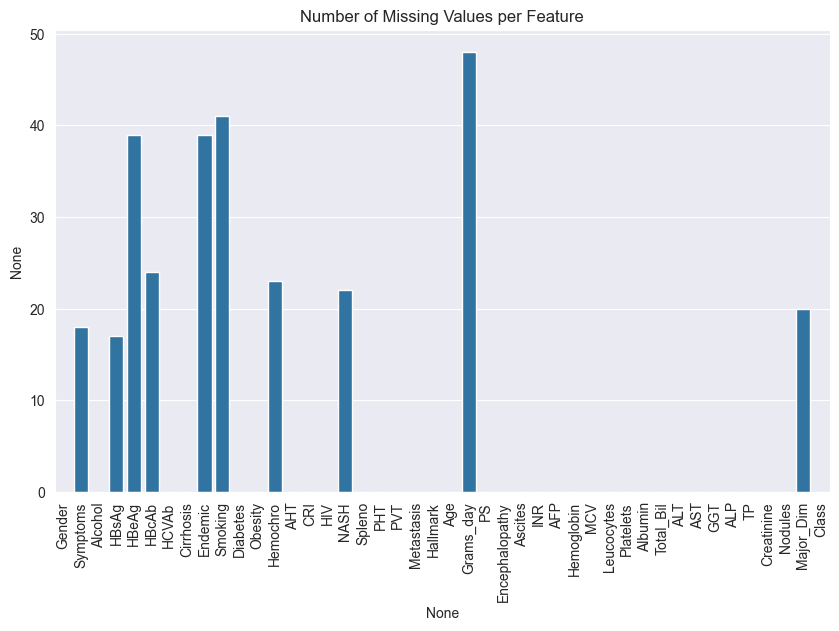

In [641]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=90)  
plt.title('Number of Missing Values per Feature')
plt.show()


In values between 10% and 30% we proceed with a more advanced imputation:

In [642]:



inferior = 10
superior = 30

colunas_imputacao = missing_percent[(missing_percent > inferior) & (missing_percent <= superior)].index
colunas_imputacao_numericas = df[colunas_imputacao].select_dtypes(include=np.number).columns
print("\nColumns for advanced imputation:", colunas_imputacao)

reg_imputer = IterativeImputer()

dados_numericos = df[colunas_imputacao].select_dtypes(include=[np.number])


df[dados_numericos.columns] = reg_imputer.fit_transform(dados_numericos)


Columns for advanced imputation: Index(['Symptoms', 'HBsAg', 'HBeAg', 'HBcAb', 'Endemic', 'Smoking', 'Hemochro',
       'NASH', 'Grams_day', 'Major_Dim'],
      dtype='object')


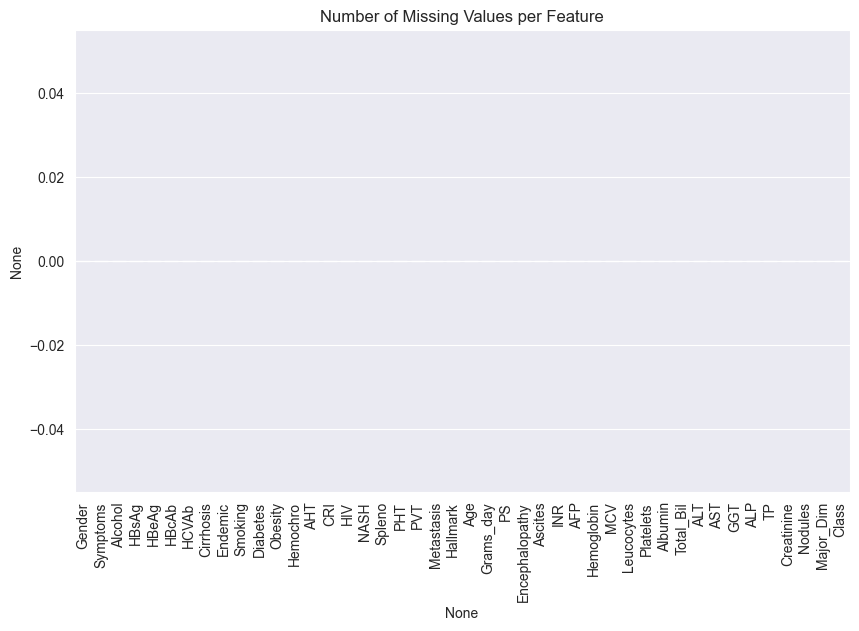

In [643]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=90)  
plt.title('Number of Missing Values per Feature')
plt.show()

Let's see the results of the imputation

In [644]:
df_2= df.copy()
# Selecting the features and the label
X2 = df_2.drop('Class', axis=1)  # Features
y2 = df_2['Class']  # Label

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)


**Decision Tree**

In [645]:
tree.fit(X_train2, y_train2)

# Testing the classifier
y_pred2_dt = tree.predict(X_test2)
accuracy2dt = accuracy_score(y_test2, y_pred2_dt)
print("Accuracy: ", accuracy2dt)



scores = cross_val_score(tree, X_train2, y_train2, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:  0.62
Cross-Validation Scores:  [0.41666667 0.83333333 0.66666667 0.58333333 0.66666667 0.63636364
 0.54545455 0.54545455 0.81818182 0.90909091]
Average Cross-Validation Score:  0.6621212121212121


**KNN**

In [646]:

knn = KNeighborsClassifier()


knn.fit(X_train2, y_train2)


y_pred_knn_2 = knn.predict(X_test2)


knn_accuracy = accuracy_score(y_test2, y_pred_knn_2)

print(f"Accuracy:{knn_accuracy}")

scores = cross_val_score(knn, X_train2, y_train2, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:0.56
Cross-Validation Scores:  [0.58333333 0.41666667 0.58333333 0.66666667 0.75       0.72727273
 0.72727273 0.54545455 0.63636364 0.72727273]
Average Cross-Validation Score:  0.6363636363636365


**Random Forest**

In [647]:
# Create an instance of RandomForestClassifier
rf_good = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
rf_good.fit(X_train2, y_train2)

# Predict the response for test dataset
y_pred2_rf= rf_good.predict(X_test2)
accuracy2_rf = accuracy_score(y_test2, y_pred2_rf)
# Model Accuracy
print(f"Accuracy:{accuracy2_rf}", )
scores2 = cross_val_score(rf_good, X_train2, y_train2, cv=10)  
print(f"Cross-validation scores: {scores2}")
print(f"Mean cross-validation score: {scores2.mean()}")

Accuracy:0.62
Cross-validation scores: [0.75       0.83333333 0.75       0.66666667 0.58333333 0.81818182
 0.72727273 0.72727273 0.90909091 0.72727273]
Mean cross-validation score: 0.7492424242424243


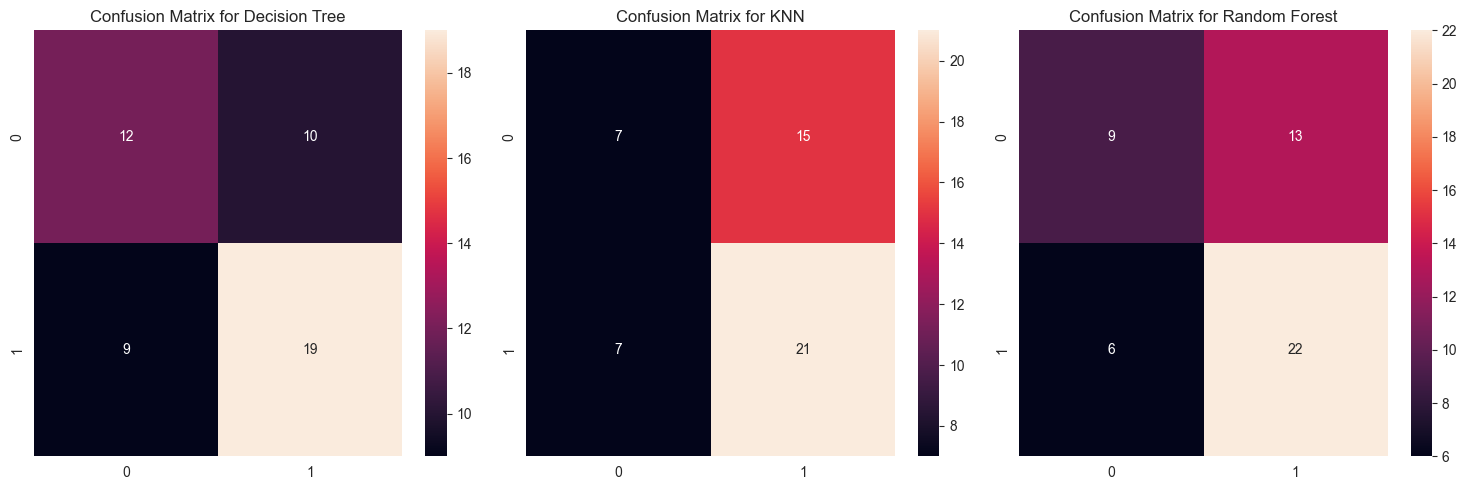

In [648]:

import matplotlib.pyplot as plt
import seaborn as sns




cm1 = confusion_matrix(y_test2, y_pred2_dt)


cm2 = confusion_matrix(y_test2, y_pred_knn_2)


cm3 = confusion_matrix(y_test2, y_pred2_rf)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for KNN')


sns.heatmap(cm3, annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()



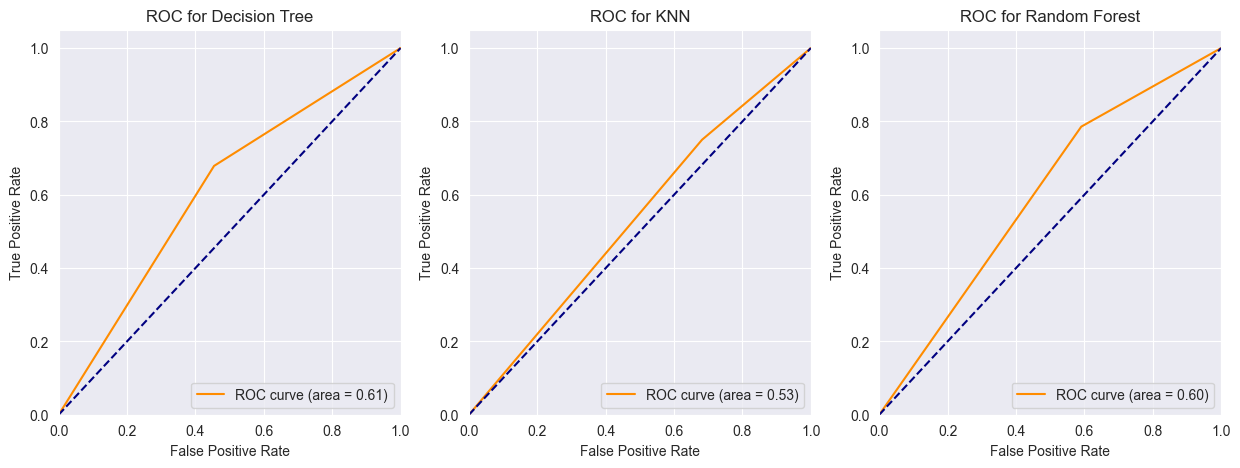

In [649]:



fpr1, tpr1, _ = roc_curve(y_test2, y_pred2_dt)
fpr2, tpr2, _ = roc_curve(y_test2, y_pred_knn_2)
frp3, tpr3, _ = roc_curve(y_test2, y_pred2_rf)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(frp3, tpr3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC for Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC for KNN')
axs[1].legend(loc="lower right")


axs[2].plot(frp3, tpr3, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc3)
axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC for Random Forest')
axs[2].legend(loc="lower right")




### Cross Validation

In [650]:


def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=4)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

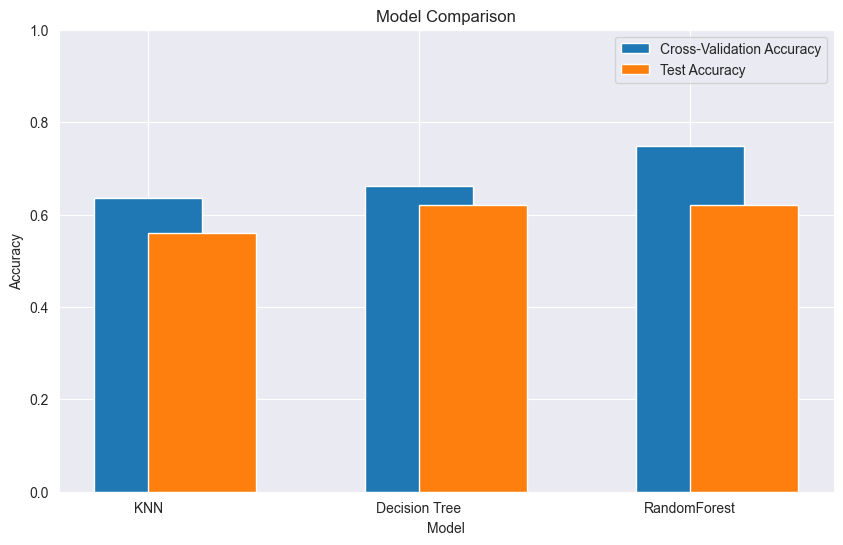

In [651]:
cv_scores_knn = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
mean_cv_score_knn = cv_scores_knn.mean()

cv_scores_tree = cross_val_score(tree, X_train2, y_train2, cv=10, scoring='accuracy')
mean_cv_score_tree = cv_scores_tree.mean()

cv_scores_rf = cross_val_score(rf_good, X_train2, y_train2, cv=10, scoring='accuracy')
mean_cv_score_rf = cv_scores_rf.mean()


models = ['KNN', 'Decision Tree','RandomForest']
cv_scores = [mean_cv_score_knn, mean_cv_score_tree, mean_cv_score_rf]
test_scores = [knn_accuracy, accuracy2dt, accuracy2_rf]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, cv_scores, width=0.4, label='Cross-Validation Accuracy', align='center')
plt.bar(x, test_scores, width=0.4, label='Test Accuracy', align='edge')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(x, models)
plt.title('Model Comparison')
plt.legend()
plt.show()

**Cross-Validation Accuracy**
A metric calculated during the model training process. Here's how it works:

Data Split: The training data is divided into K subsets (folds). One of the folds is used as a validation set and the remaining K-1 folds are used to train the model.
This process is repeated K times, with each fold being used once as a validation set.
Cross-Validation Accuracy is the average of the accuracies obtained.

Advantages:

* Robust Evaluation: It offers a more robust evaluation of the model because it uses several splits of the training data.
* Overfitting Detection: It helps to detect overfitting problems, as the model is tested on different subsets of the data.

Disadvantages:

* Computational Cost: It can be computationally costly, especially for large datasets, because the model is trained and evaluated multiple times.

**Test Accuracy**

Test Accuracy is the accuracy calculated on the test dataset, which is separate from the training and validation dataset. The model is trained using the entire training dataset (or the K-1 folds if cross-validation was used) and is evaluated on the test dataset, which was not used during the process.

Advantages:

* Realistic Evaluation: It offers a more realistic estimate of how the model will perform on new data.
* Simplicity: It is simpler to calculate and interpret.

Disadvantages:

* Depends on Data Split: The performance can depend a lot on how the data is split between training and testing.

## 4º test
<a id="teste4"></a>

[[ go back to the top ]](#Table-of-contents)

Implementing the **IQR method** to remove outliers, replacing outliers with the mean of the remaining data.

In [652]:
# Create a new DataFrame
df_IQR = df.copy()

# For numerical columns
for column in numerical_features:
    Q1 = df_IQR[column].quantile(0.25)
    Q3 = df_IQR[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace the outliers with the mean of the remaining data
    df_IQR[column] = np.where((df_IQR[column] < lower_bound) | (df_IQR[column] > upper_bound), df_IQR[column].mean(), df_IQR[column])

# For categorical columns
for column in categorical_features:
    # Get the mode of the column
    mode = df_IQR[column].mode()[0]

    # Define the upper bound for outliers
    upper_bound = df_IQR[column].value_counts().quantile(0.75) + 1.5 * (df_IQR[column].value_counts().quantile(0.75) - df_IQR[column].value_counts().quantile(0.25))

    # Get the values counts of the column
    value_counts = df_IQR[column].value_counts()

    # Get the outliers
    outliers = value_counts[value_counts > upper_bound].index

    # Replace the outliers with the mode
    df_IQR[column] = df_IQR[column].replace(outliers, mode)

In [653]:
# Selecting the features and the label
X1_IQR = df_IQR.drop('Class', axis=1)  # Features
y1_IQR = df_IQR['Class']  # Label

# Split the data into training and testing sets
X_train1_IQR, X_test1_IQR, y_train1_IQR, y_test1_IQR = train_test_split(X1_IQR, y1_IQR, test_size=0.3, random_state=42)

**Decision Tree**

In [654]:
tree.fit(X_train1_IQR, y_train1_IQR)

y_pred_iqr_dt= tree.predict(X_test1_IQR)
accuracy_iqr_dt = accuracy_score(y_test1_IQR, y_pred_iqr_dt)
# Model Accuracy
print(f"Accuracy:{accuracy_iqr_dt}", )

scores_IQR = cross_val_score(tree, X_train1_IQR, y_train1_IQR, cv=10) 

print(f"Cross-validation scores: {scores_IQR}")
print(f"Mean cross-validation score: {scores_IQR.mean()}")

Accuracy:0.6
Cross-validation scores: [0.75       0.75       0.66666667 0.58333333 0.75       0.54545455
 0.72727273 0.63636364 0.72727273 0.72727273]
Mean cross-validation score: 0.6863636363636364


**KNN**

In [655]:
knn.fit(X_train1_IQR, y_train1_IQR)

y_pred_iqr_knn= knn.predict(X_test1_IQR)
accuracy_iqr_knn = accuracy_score(y_test1_IQR, y_pred_iqr_knn)
# Model Accuracy
print(f"Accuracy:{accuracy_iqr_knn}", )

scores_IQR = cross_val_score(knn, X_train1_IQR, y_train1_IQR, cv=10) 

print(f"Cross-validation scores: {scores_IQR}")
print(f"Mean cross-validation score: {scores_IQR.mean()}")

Accuracy:0.62
Cross-validation scores: [0.66666667 0.41666667 0.66666667 0.66666667 0.75       0.63636364
 0.72727273 0.54545455 0.72727273 0.81818182]
Mean cross-validation score: 0.6621212121212122


**Random Forest**

In [656]:
rf_good.fit(X_train1_IQR, y_train1_IQR)

y_pred_iqr_rf= rf_good.predict(X_test1_IQR)
accuracy_iqr_rf = accuracy_score(y_test1_IQR, y_pred_iqr_rf)
# Model Accuracy
print(f"Accuracy:{accuracy_iqr_rf}", )

# Perform cross-validation on the Random Forest model
scores_IQR = cross_val_score(rf_good, X_train1_IQR, y_train1_IQR, cv=10)  # cv is the number of folds (k)

print(f"Cross-validation scores: {scores_IQR}")
print(f"Mean cross-validation score: {scores_IQR.mean()}")

Accuracy:0.72
Cross-validation scores: [0.75       0.83333333 0.66666667 0.58333333 0.58333333 0.72727273
 0.63636364 0.72727273 0.81818182 0.72727273]
Mean cross-validation score: 0.7053030303030303


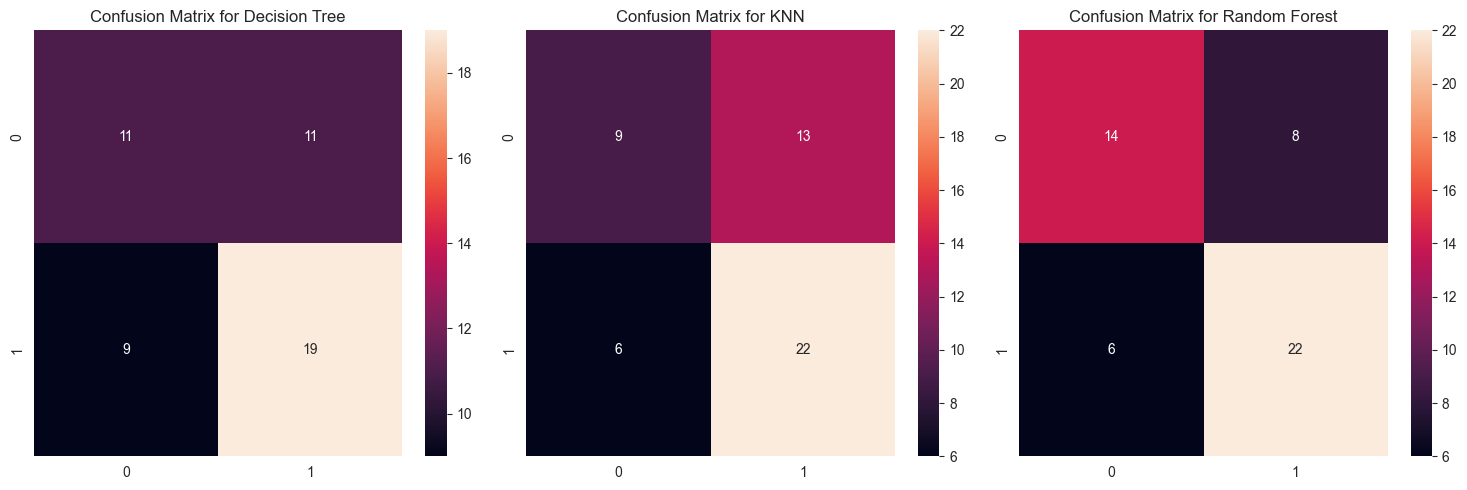

In [657]:

import matplotlib.pyplot as plt
import seaborn as sns




cm1 = confusion_matrix(y_test1_IQR, y_pred_iqr_dt)


cm2 = confusion_matrix(y_test1_IQR, y_pred_iqr_knn)


cm3 = confusion_matrix(y_test1_IQR, y_pred_iqr_rf)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for KNN')


sns.heatmap(cm3, annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()




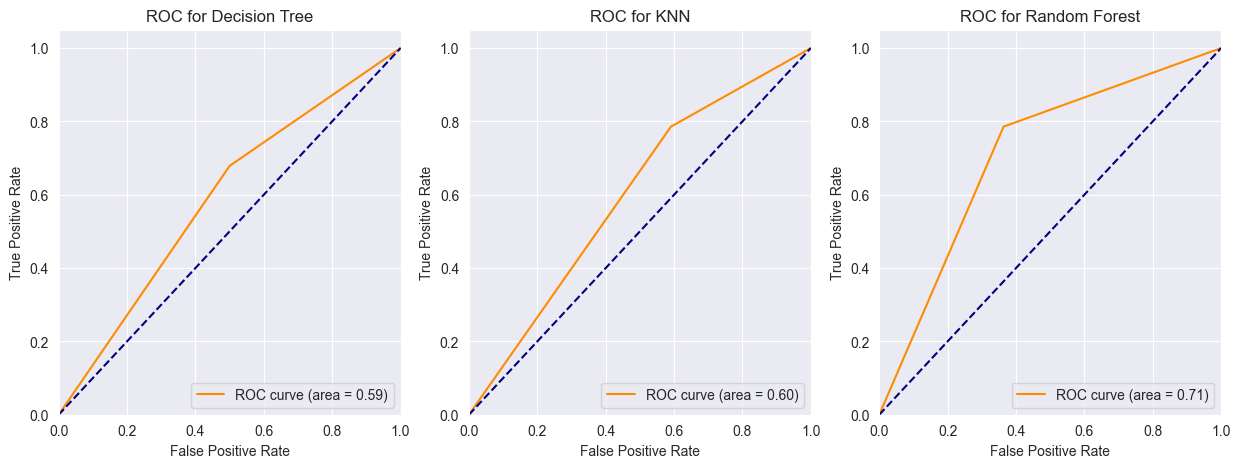

In [658]:



fpr1, tpr1, _ = roc_curve(y_test1_IQR, y_pred_iqr_dt)
fpr2, tpr2, _ = roc_curve(y_test1_IQR, y_pred_iqr_knn)
frp3, tpr3, _ = roc_curve(y_test1_IQR, y_pred_iqr_rf)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(frp3, tpr3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC for Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC for KNN')
axs[1].legend(loc="lower right")


axs[2].plot(frp3, tpr3, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc3)
axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC for Random Forest')
axs[2].legend(loc="lower right")




#### LOOKING FOR THE MOST EFFICIENT

After removing the columns with more than 30% of missing values, we proceeded to remove the outliers by replacing them with tht mean. The changes were not very noticeable.


## 5º test
<a id="teste5"></a>

[[ go back to the top ]](#Table-of-contents)

**Correlation with the Target Variable:**

How It Works:
Calculate the correlation coefficient between each feature and the target variable.
Select features that have a high absolute correlation with the target variable.

Pros:
* Simplicity: Easy to understand and implement.
* Speed: Computationally inexpensive as it only requires calculating correlation coefficients.
* Independence: Does not depend on a specific machine learning model.

Cons:
* Linear Relationship: Only captures linear relationships between features and the target variable.
* Ignores Interactions: Does not consider interactions between features.
* Ignores Redundancy: May select multiple correlated features that do not add additional information.

**Lets analyze the correlation of the variables and select the most strongly related to 'Class' initially in the data set, already without the columns with more than 30% of missing values**

In [659]:
correlation_matrix = df.corr(method='spearman')  
correlation_with_class = correlation_matrix['Class'].sort_values(ascending=False)

correlation_with_class

Class             1.000000
PS                0.371745
Hemoglobin        0.311219
Albumin           0.291680
TP                0.144427
Endemic           0.086257
AHT               0.065779
MCV               0.061551
Smoking           0.039891
Gender            0.038435
Cirrhosis         0.037557
Hallmark          0.030757
Obesity           0.024323
HIV               0.013581
NASH              0.000000
HBcAb            -0.004856
PHT              -0.022568
Spleno           -0.030557
ALT              -0.032744
Alcohol          -0.040302
Grams_day        -0.042045
HBeAg            -0.064796
HBsAg            -0.081619
CRI              -0.090343
Nodules          -0.091807
HCVAb            -0.093086
Leucocytes       -0.101106
Encephalopathy   -0.105039
Platelets        -0.117862
Diabetes         -0.121668
Creatinine       -0.124588
Total_Bil        -0.145984
INR              -0.155595
Age              -0.164154
GGT              -0.176005
Major_Dim        -0.187576
PVT              -0.219118
A

Variables with Higher Positive Correlation
Hemoglobin (0.39): Indicates that higher levels of hemoglobin are associated with a higher probability of "Lives".
Iron (0.36): Indicates that higher levels of iron are associated with a higher probability of "Lives".
Albumin (0.32): Indicates that higher levels of albumin are associated with a higher probability of "Lives".

Variables with Higher Negative Correlation
ALP (-0.39): Indicates that higher levels of ALP (alkaline phosphatase) are associated with a higher probability of "Dies".
INR (-0.23): Indicates that higher levels of INR (International Normalized Ratio) are associated with a higher probability of "Dies".
Dir_Bil (-0.21): Indicates that higher levels of direct bilirubin are associated with a higher probability of "Dies".

Variables with correlation close to zero (positive or negative) may have a lesser influence on the dependent variable "Class". Higher correlations (positive or negative) suggest variables that may be more important for analysis or modeling.

### Correlation of selected features with the feature 'Class'

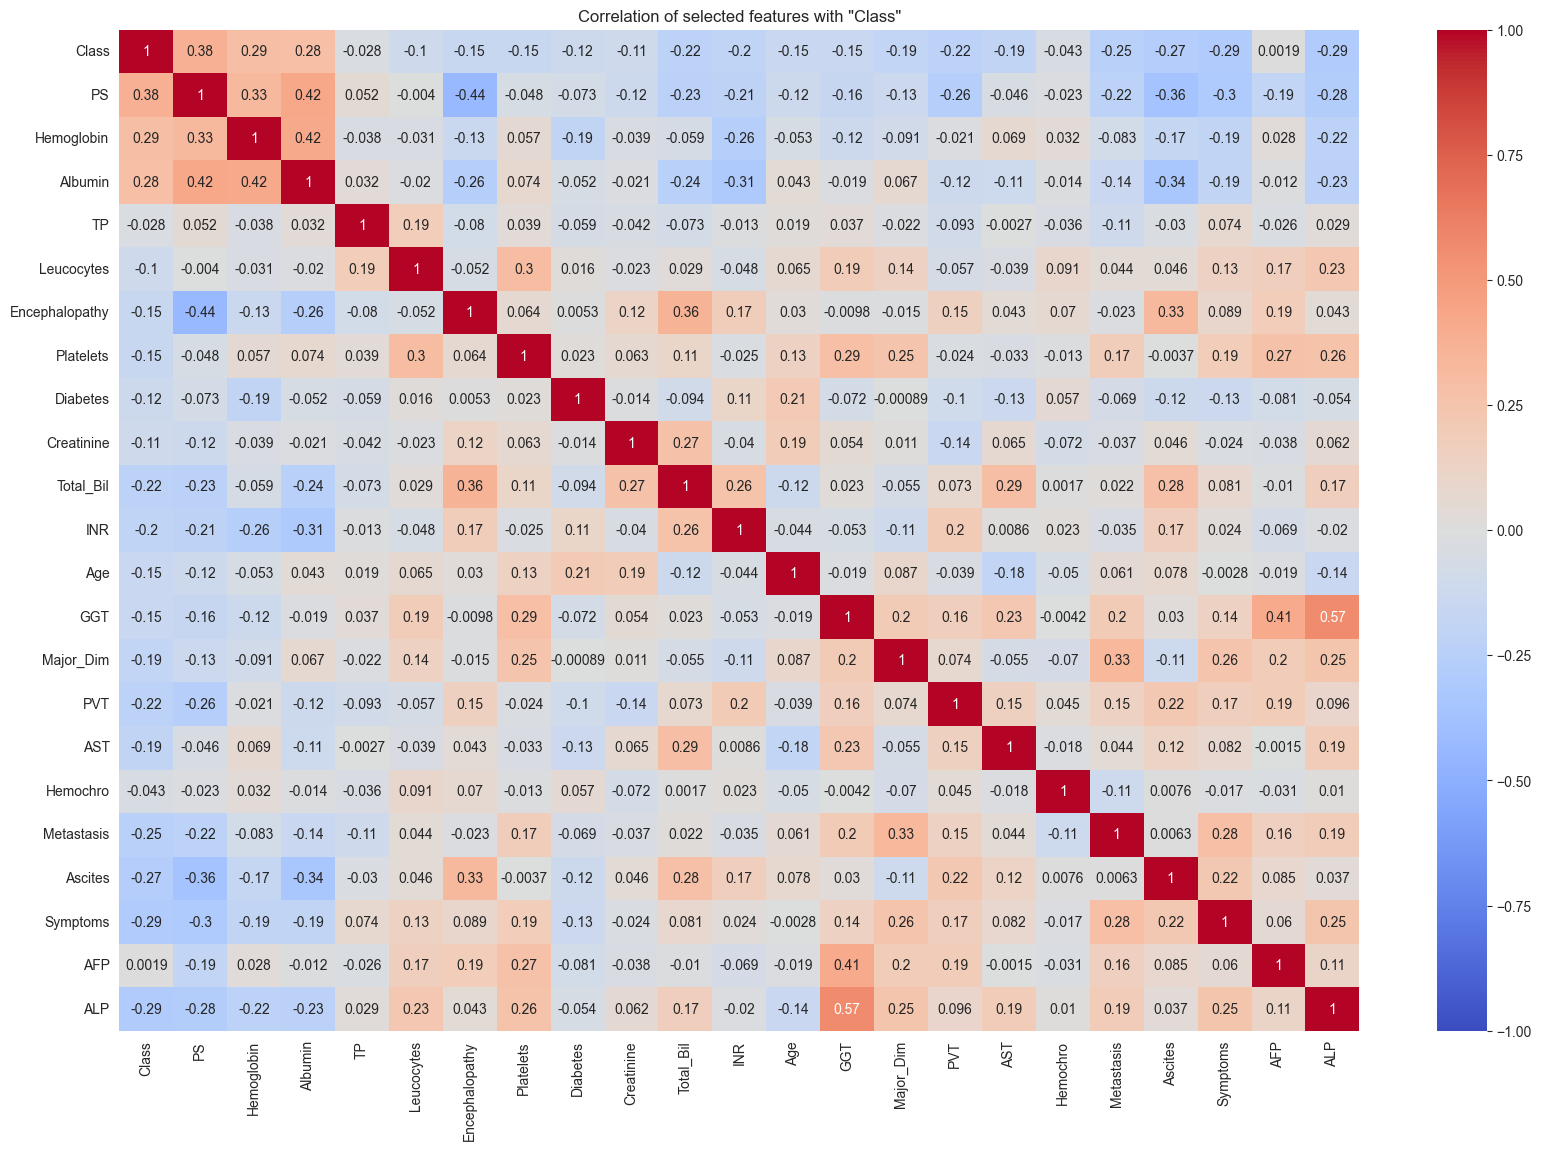

In [660]:

selected_features_matrix = correlation_with_class[correlation_with_class.abs() > 0.10].index.tolist()


plt.figure(figsize=(20, 13))
sns.heatmap(df[selected_features_matrix].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of selected features with "Class"')
plt.show()

In [661]:
selected_features = correlation_with_class[correlation_with_class.abs() > 0.10]
selected_features = selected_features.abs().sort_values(ascending=False).index.tolist()

selected_features.remove('Class')
print(f"selected features: {selected_features}")
print(len(selected_features))

selected features: ['ALP', 'PS', 'AFP', 'Symptoms', 'Hemoglobin', 'Albumin', 'Ascites', 'Metastasis', 'Hemochro', 'AST', 'PVT', 'Major_Dim', 'GGT', 'Age', 'INR', 'Total_Bil', 'TP', 'Creatinine', 'Diabetes', 'Platelets', 'Encephalopathy', 'Leucocytes']
22


In [662]:
X_selected = df[selected_features]

X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(X_selected, y1, test_size=0.3, random_state=42)

**Decision Tree**

In [663]:
tree.fit(X_train_cor, y_train_cor)
y_pred_cor_dt = tree.predict(X_test_cor)
accuracy_cor_dt = accuracy_score(y_test_cor, y_pred_cor_dt)
print(f"Accuracy:{accuracy_cor_dt}")

scores = cross_val_score(tree, X_train_cor, y_train_cor, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:0.62
Cross-Validation Scores:  [0.66666667 0.83333333 0.66666667 0.75       0.58333333 0.63636364
 0.54545455 0.45454545 0.72727273 0.72727273]
Average Cross-Validation Score:  0.6590909090909092


**Random Forest**

In [664]:

rf_good.fit(X_train_cor, y_train_cor)
y_pred_cor_rf = rf_good.predict(X_test_cor)
accuracy_cor_rf = accuracy_score(y_test_cor, y_pred_cor_rf)
print(f"Accuracy:{accuracy_cor_rf}")

scores = cross_val_score(rf_good, X_train_cor, y_train_cor, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:0.72
Cross-Validation Scores:  [0.66666667 0.83333333 0.83333333 0.58333333 0.66666667 0.81818182
 0.72727273 0.81818182 0.90909091 0.72727273]
Average Cross-Validation Score:  0.7583333333333334


**KNN**

In [665]:
knn.fit(X_train_cor, y_train_cor)

y_pred_cor_knn= knn.predict(X_test_cor)
accuracy_cor_knn = accuracy_score(y_test_cor, y_pred_cor_knn)
print(f"Accuracy:{accuracy_cor_knn}")

# Perform cross-validation on the KNN model
scores_IQR_good = cross_val_score(knn, X_train_cor, y_train_cor, cv=10)  # cv is the number of folds (k)

print(f"Cross-validation scores: {scores_IQR_good}")
print(f"Mean cross-validation score: {scores_IQR_good.mean()}")

Accuracy:0.56
Cross-validation scores: [0.58333333 0.41666667 0.58333333 0.66666667 0.66666667 0.72727273
 0.72727273 0.54545455 0.63636364 0.72727273]
Mean cross-validation score: 0.6280303030303032


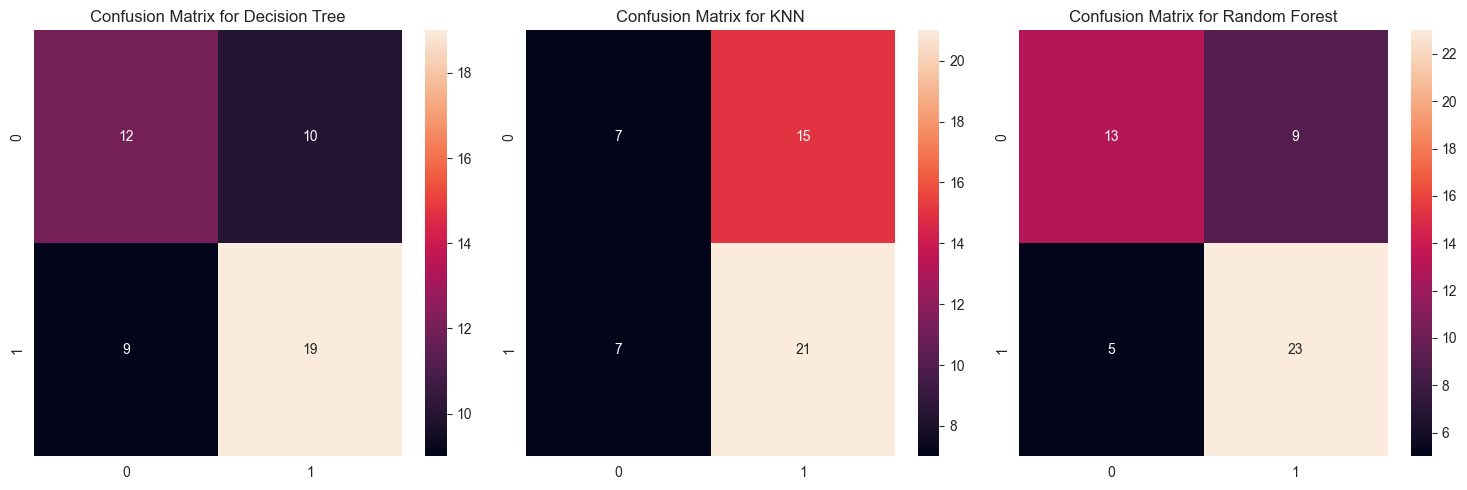

In [666]:

import matplotlib.pyplot as plt
import seaborn as sns


cm1 = confusion_matrix(y_test_cor, y_pred_cor_dt)


cm2 = confusion_matrix(y_test_cor, y_pred_cor_knn)


cm3 = confusion_matrix(y_test_cor, y_pred_cor_rf)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for KNN')


sns.heatmap(cm3, annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()


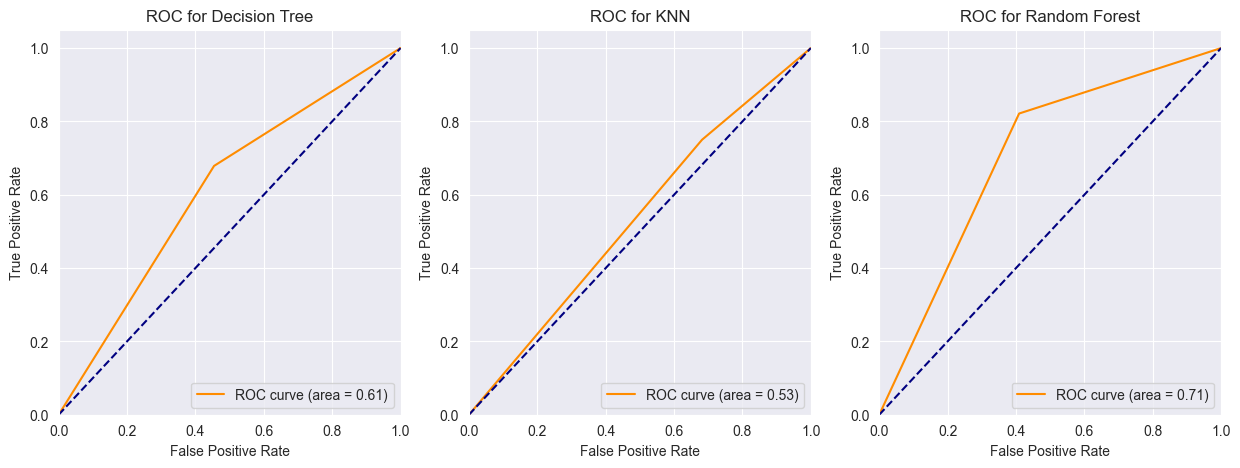

In [667]:



fpr1, tpr1, _ = roc_curve(y_test_cor, y_pred_cor_dt)
fpr2, tpr2, _ = roc_curve(y_test_cor, y_pred_cor_knn)
frp3, tpr3, _ = roc_curve(y_test_cor, y_pred_cor_rf)


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(frp3, tpr3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC for Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC for KNN')
axs[1].legend(loc="lower right")


axs[2].plot(frp3, tpr3, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc3)
axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC for Random Forest')
axs[2].legend(loc="lower right")


Now we will test on the data set that had the outliers replaced by the mean and mode.

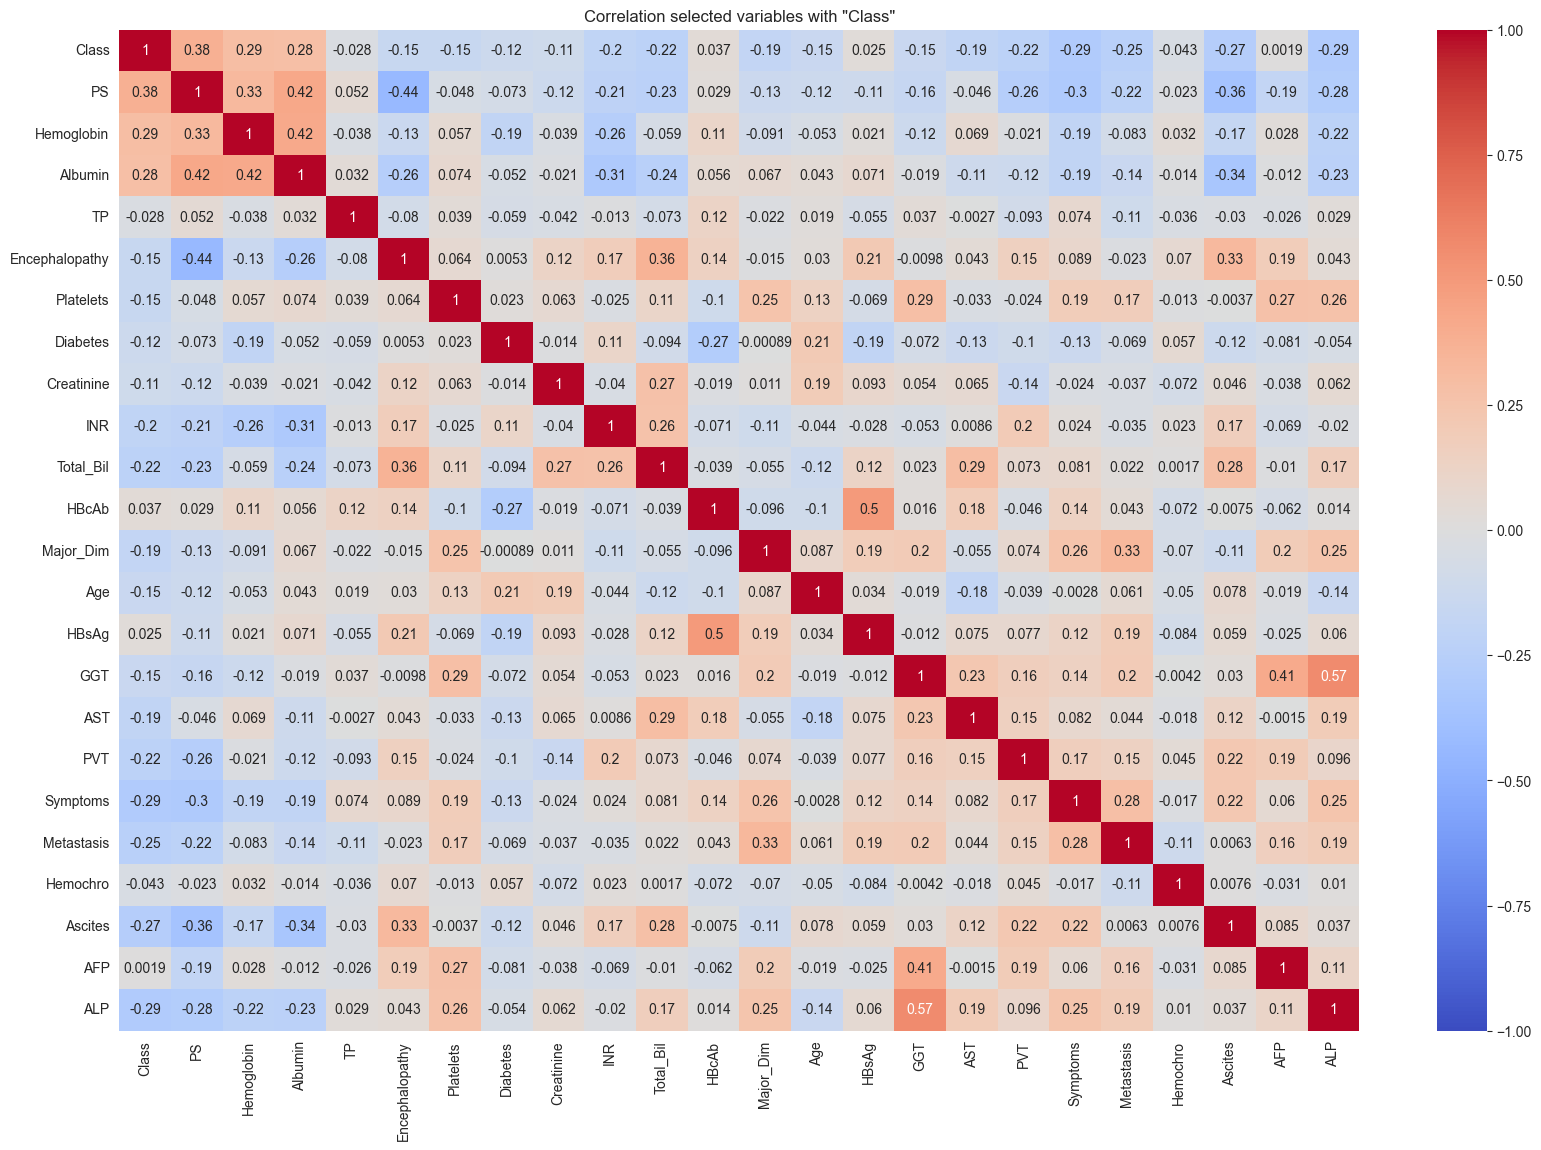

selected features: ['PS', 'ALP', 'AFP', 'Hemoglobin', 'Albumin', 'Ascites', 'Hemochro', 'Metastasis', 'Symptoms', 'PVT', 'AST', 'GGT', 'TP', 'HBsAg', 'Age', 'Major_Dim', 'HBcAb', 'Total_Bil', 'INR', 'Creatinine', 'Diabetes', 'Platelets', 'Encephalopathy']
23


In [668]:

correlation_matrix2 = df_IQR.corr(method='spearman')  
correlation_with_class2 = correlation_matrix2['Class'].sort_values(ascending=False)

correlation_with_class2


selected_features_matrix2 = correlation_with_class2[correlation_with_class2.abs() > 0.10].index.tolist()

plt.figure(figsize=(20, 13))
sns.heatmap(df[selected_features_matrix2].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation selected variables with "Class"')
plt.show()


selected_features2 = correlation_with_class2[correlation_with_class2.abs() > 0.10]
selected_features2 = selected_features2.abs().sort_values(ascending=False).index.tolist()

selected_features2.remove('Class')
print(f"selected features: {selected_features2}")
print(len(selected_features2))

In [669]:
X_selected2 = df_IQR[selected_features2]

X_train_cor2, X_test_cor2, y_train_cor2, y_test_cor2 = train_test_split(X_selected2, y1, test_size=0.3, random_state=42)

**Decision Tree**

In [670]:
tree.fit(X_train_cor2, y_train_cor2)
y_pred_cor_dt2 = tree.predict(X_test_cor2)
accuracy_cor_dt2 = accuracy_score(y_test_cor2, y_pred_cor_dt2)
print(f"Accuracy:{accuracy_cor_dt2}")

scores = cross_val_score(tree, X_train_cor2, y_train_cor2, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:0.62
Cross-Validation Scores:  [0.58333333 0.75       0.66666667 0.5        0.66666667 0.54545455
 0.63636364 0.72727273 0.90909091 0.54545455]
Average Cross-Validation Score:  0.6530303030303031


**Random Forest**

In [671]:

rf_good.fit(X_train_cor2, y_train_cor2)
y_pred_cor_rf2 = rf_good.predict(X_test_cor2)
accuracy_cor_rf2 = accuracy_score(y_test_cor2, y_pred_cor_rf2)
print(f"Accuracy:{accuracy_cor_rf2}")

scores = cross_val_score(rf_good, X_train_cor2, y_train_cor2, cv=10)
print("Cross-Validation Scores: ", scores)
print("Average Cross-Validation Score: ", scores.mean())

Accuracy:0.76
Cross-Validation Scores:  [0.66666667 0.83333333 0.75       0.58333333 0.58333333 0.72727273
 0.81818182 0.81818182 0.90909091 0.63636364]
Average Cross-Validation Score:  0.7325757575757577


**KNN**

In [672]:
knn.fit(X_train_cor2, y_train_cor2)

y_pred_cor_knn2= knn.predict(X_test_cor2)
accuracy_cor_knn2 = accuracy_score(y_test_cor2, y_pred_cor_knn2)
print(f"Accuracy:{accuracy_cor_knn2}")

# Perform cross-validation on the KNN model
scores_IQR_good = cross_val_score(knn, X_train_cor2, y_train_cor2, cv=10)  # cv is the number of folds (k)

print(f"Cross-validation scores: {scores_IQR_good}")
print(f"Mean cross-validation score: {scores_IQR_good.mean()}")

Accuracy:0.62
Cross-validation scores: [0.58333333 0.41666667 0.66666667 0.66666667 0.66666667 0.63636364
 0.72727273 0.54545455 0.72727273 0.81818182]
Mean cross-validation score: 0.6454545454545454


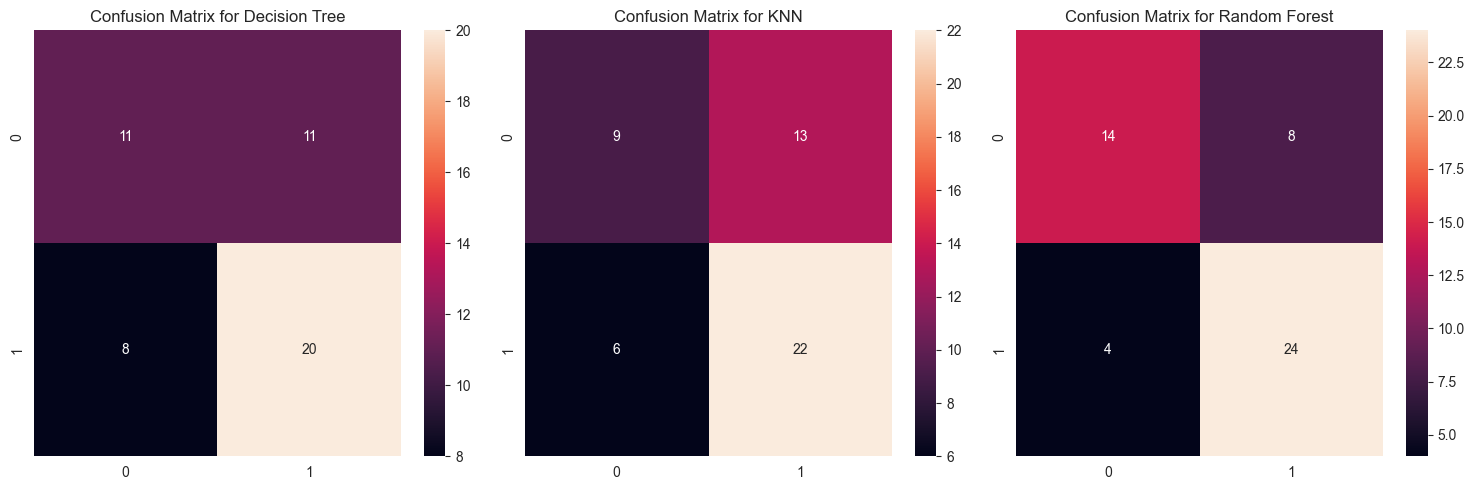

In [673]:

import matplotlib.pyplot as plt
import seaborn as sns




cm1 = confusion_matrix(y_test_cor2, y_pred_cor_dt2)


cm2 = confusion_matrix(y_test_cor2, y_pred_cor_knn2)


cm3 = confusion_matrix(y_test_cor2, y_pred_cor_rf2)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for KNN')


sns.heatmap(cm3, annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()


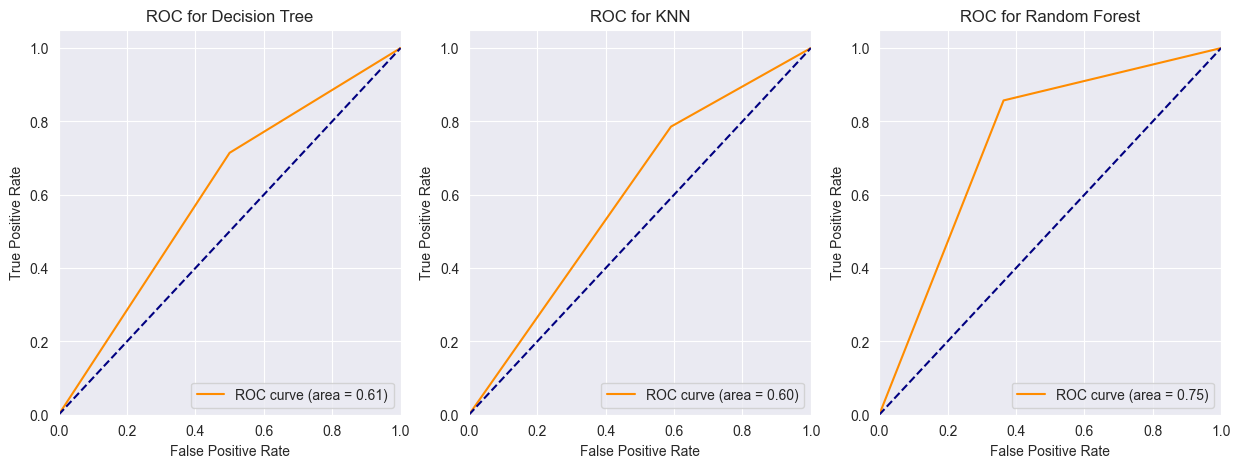

In [674]:


fpr1, tpr1, _ = roc_curve(y_test_cor2, y_pred_cor_dt2)
fpr2, tpr2, _ = roc_curve(y_test_cor2, y_pred_cor_knn2)
frp3, tpr3, _ = roc_curve(y_test_cor2, y_pred_cor_rf2)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(frp3, tpr3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC for Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC for KNN')
axs[1].legend(loc="lower right")


axs[2].plot(frp3, tpr3, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc3)
axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC for Random Forest')
axs[2].legend(loc="lower right")


Analysis about the correlation:

The relationship of the variables with 'Class' after replacing the outliers did not bring good accuracy percentages compared to the relationship of the variables when they were in their original form. Therefore, we will not replace the outliers in the initial data set with the mean and we will keep it in the df_IQR form.

## 6º test
<a id="teste6"></a>

[[ go back to the top ]](#Table-of-contents)

### Seeing each feature importance

In [675]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
clf.fit(X1, y1)

# Assuming rf_good is the trained RandomForestClassifier
importances = clf.feature_importances_

feature_importances = []

# Assuming df is the DataFrame that was used to create X1
feature_names = df.columns

for feature in zip(feature_names, clf.feature_importances_):
    feature_importances.append((feature[0], feature[1]))
    print(f"{feature[0]} score of: {feature[1]}")

Gender score of: 0.00428179477843346
Symptoms score of: 0.030031948468335085
Alcohol score of: 0.004113246229484676
HBsAg score of: 0.006685558851174937
HBeAg score of: 0.0005877804869194231
HBcAb score of: 0.00727747033253808
HCVAb score of: 0.007357205961299552
Cirrhosis score of: 0.0014195280516097711
Endemic score of: 0.006668983090818653
Smoking score of: 0.004166026981529331
Diabetes score of: 0.004465493820354771
Obesity score of: 0.002390365990527117
Hemochro score of: 0.010312295630447983
AHT score of: 0.006508945026416261
CRI score of: 0.005278879091068482
HIV score of: 0.002765129234210959
NASH score of: 0.0021010952405389194
Spleno score of: 0.01245432673408378
PHT score of: 0.0029665273322527206
PVT score of: 0.003844990885515919
Metastasis score of: 0.004579487268470876
Hallmark score of: 0.011367087563314417
Age score of: 0.00458120902335148
Grams_day score of: 0.03140576190844269
PS score of: 0.01733528749496684
Encephalopathy score of: 0.022223901573541448
Ascites scor

In [676]:
selected_features2 = [feature[0] for feature in feature_importances if feature[1] >= 0.025]
# Select only the selected features for X
X1_selected2 = df[selected_features2]  # Features
y1_selected2 = df['Class']  # Label

# Split the data into training and testing sets
X_train1_IQR_selected, X_test1_IQR_selected, y_train1_IQR_selected, y_test1_IQR_selected = train_test_split(X1_selected2, y1_selected2, test_size=0.3, random_state=42)


**Decision Tree**

In [677]:
# Train the model using the training sets
tree.fit(X_train1_IQR_selected, y_train1_IQR_selected)

y_imp_dt= tree.predict(X_test1_IQR_selected)
accuracy_imp_dt = accuracy_score(y_test1_IQR_selected, y_imp_dt)
print(f"Accuracy:{accuracy_imp_dt}")

# Perform cross-validation on the Random Forest model
scores_imp_selected = cross_val_score(tree, X_train1_IQR_selected, y_train1_IQR_selected, cv=10)  # cv is the number of folds (k)

print(f"Cross-validation scores: {scores_imp_selected}")
print(f"Mean cross-validation score: {scores_imp_selected.mean()}")

Accuracy:0.62
Cross-validation scores: [0.5        0.83333333 0.66666667 0.5        0.58333333 0.63636364
 0.54545455 0.72727273 0.72727273 0.45454545]
Mean cross-validation score: 0.6174242424242424


**Random Forest**

In [678]:
# Train the model using the training sets
rf_good.fit(X_train1_IQR_selected, y_train1_IQR_selected)

y_imp_rf= rf_good.predict(X_test1_IQR_selected)
accuracy_imp_rf = accuracy_score(y_test1_IQR_selected, y_imp_rf)
print(f"Accuracy:{accuracy_imp_rf}")

# Perform cross-validation on the Random Forest model
scores_IQR_selected = cross_val_score(rf_good, X_train1_IQR_selected, y_train1_IQR_selected, cv=10)  # cv is the number of folds (k)

print(f"Cross-validation scores: {scores_IQR_selected}")
print(f"Mean cross-validation score: {scores_IQR_selected.mean()}")

Accuracy:0.7
Cross-validation scores: [0.66666667 0.91666667 0.58333333 0.83333333 0.66666667 0.81818182
 0.63636364 0.81818182 0.81818182 0.81818182]
Mean cross-validation score: 0.7575757575757576


**KNN**

In [679]:
# Train the model using the training sets
knn.fit(X_train1_IQR_selected, y_train1_IQR_selected)

y_imp_knn= knn.predict(X_test1_IQR_selected)
accuracy_imp_knn = accuracy_score(y_test1_IQR_selected, y_imp_knn)
print(f"Accuracy:{accuracy_imp_knn}")

# Perform cross-validation on the Random Forest model
scores_IQR_selected = cross_val_score(knn, X_train1_IQR_selected, y_train1_IQR_selected, cv=10)  # cv is the number of folds (k)

print(f"Cross-validation scores: {scores_IQR_selected}")
print(f"Mean cross-validation score: {scores_IQR_selected.mean()}")

Accuracy:0.64
Cross-validation scores: [0.58333333 0.66666667 0.75       0.66666667 0.58333333 0.81818182
 0.54545455 0.54545455 0.72727273 0.72727273]
Mean cross-validation score: 0.6613636363636364


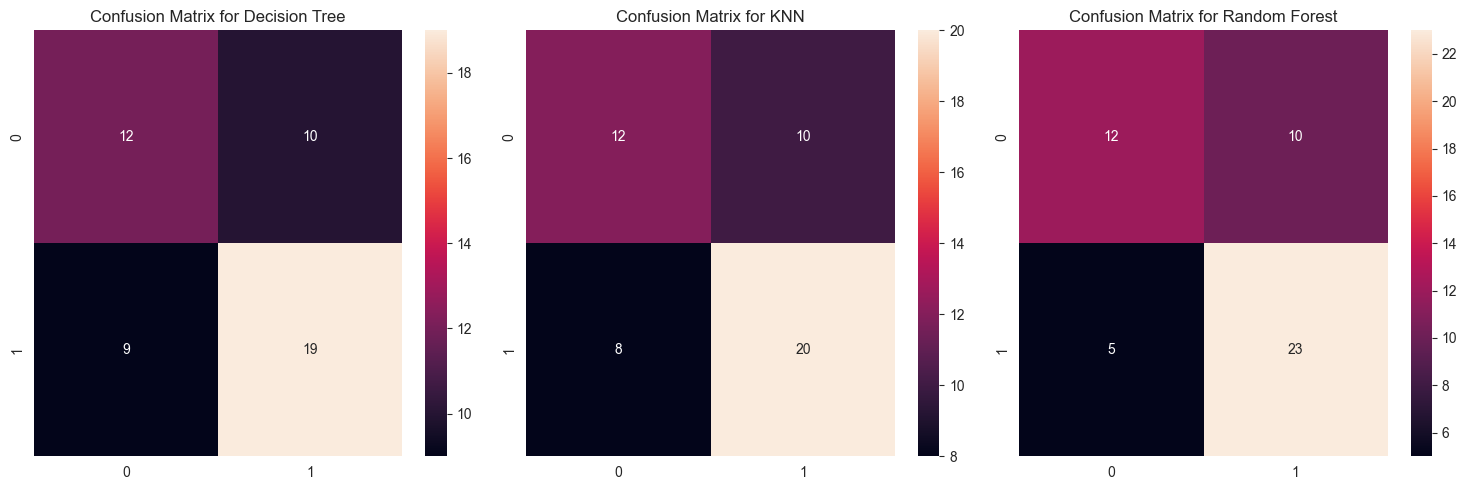

In [680]:





cm1 = confusion_matrix(y_test1_IQR_selected, y_imp_dt)


cm2 = confusion_matrix(y_test1_IQR_selected, y_imp_knn)


cm3 = confusion_matrix(y_test1_IQR_selected, y_imp_rf)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm1, annot=True, fmt='d', ax=axs[0])
axs[0].set_title('Confusion Matrix for Decision Tree')


sns.heatmap(cm2, annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Confusion Matrix for KNN')


sns.heatmap(cm3, annot=True, fmt='d', ax=axs[2])
axs[2].set_title('Confusion Matrix for Random Forest')

plt.tight_layout()
plt.show()

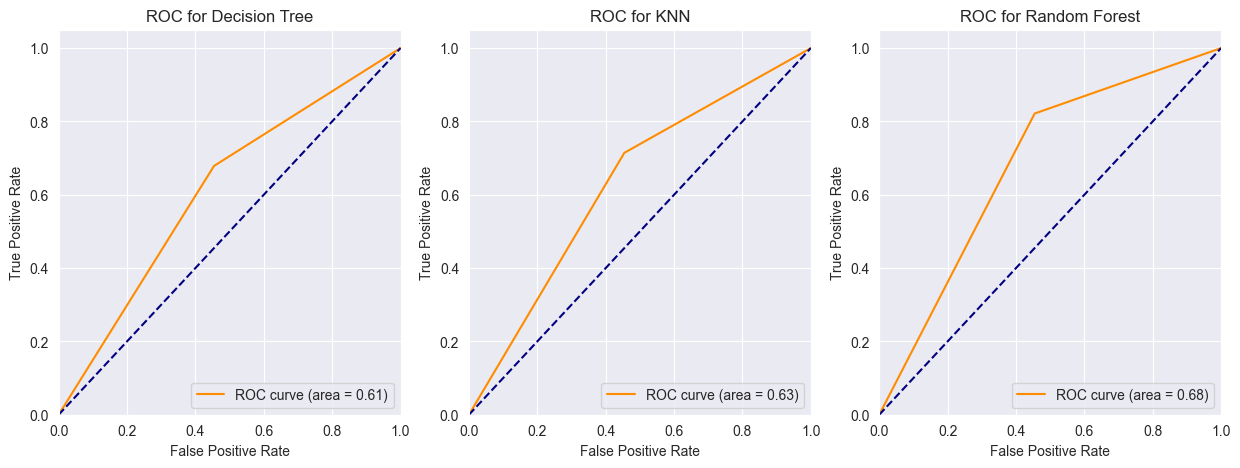

In [681]:


fpr1, tpr1, _ = roc_curve(y_test1_IQR_selected, y_imp_dt)
fpr2, tpr2, _ = roc_curve(y_test1_IQR_selected, y_imp_knn)
frp3, tpr3, _ = roc_curve(y_test1_IQR_selected, y_imp_rf)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(frp3, tpr3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].plot(fpr1, tpr1, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
axs[0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC for Decision Tree')
axs[0].legend(loc="lower right")


axs[1].plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC for KNN')
axs[1].legend(loc="lower right")


axs[2].plot(frp3, tpr3, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc3)
axs[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC for Random Forest')
axs[2].legend(loc="lower right")

### Comparing results

In [682]:
accuracy_dict_dt = {
    'accuracy1': accuracy1,
    'accuracy_good_dt': accuracy_good_dt,
    'accuracy_drop_dt': accuracy_drop_dt,
    'accuracy2dt': accuracy2dt,
    'accuracy_iqr_dt': accuracy_iqr_dt,
    'accuracy_cor_dt': accuracy_cor_dt,
    'accuracy_cor_dt2': accuracy_cor_dt2,
    'accuracy_imp_dt': accuracy_imp_dt
}

max_accuracy_name = max(accuracy_dict_dt, key=lambda x: np.average(accuracy_dict_dt[x]))
print(max_accuracy_name)

accuracy_drop_dt


Therefore, the best result from the Decision Tree was obtained in the second test, after preprocessing, column removal, and removal of the 'Dir_Bil' feature.

In [683]:



dt = DecisionTreeClassifier()


param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_drop_feature_dir, y_drop_feature_dir)


print("Best parameters: ", grid_search.best_params_)


print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.7030303030303029


After running this test several times, we concluded that this is the best result:

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Best accuracy: 0.7333333333333334

In [684]:
accuracy_dict_rf = {
    'accuracy1_rf': accuracy1_rf,
    'accuracy_good_rf': accuracy1_good_rf,
    'accuracy_drop_rf': accuracy_drop_rf,
    'accuracyrf': accuracy2_rf,
    'accuracy_iqr_rf': accuracy_iqr_rf,
    'accuracy_cor_dt': accuracy_cor_rf,
    'accuracy_cor_dt2': accuracy_cor_rf2,
    'accuracy_imp_dt': accuracy_imp_rf
}

max_accuracy_name = max(accuracy_dict_rf, key=lambda x: np.average(accuracy_dict_rf[x]))
print(max_accuracy_name)

accuracy_drop_rf


The best result from Random Forest was also obtained in the second test, after preprocessing, column removal, and removal of the 'Dir_Bil'feature.

In [685]:



knn = KNeighborsClassifier()


param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X1_selected2, y1_selected2)


print("Best parameters: ", grid_search.best_params_)

print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
Best accuracy:  0.6909090909090908


# CONCLUSION

Throughout the entire process, a total of six tests were conducted (with multiple analyses). We used the Decision Tree, Random Forest, and KNN algorithms. Column removal and removal of variables that have a very strong relationship with each other were performed to produce better results. After all the preprocessing, we noticed that we obtained relatively good percentages, yet we decided to proceed with multiple other tests to try to increase efficiency.

In the decision tree and random forest using the second test, we obtained the best accuracy. After parameter testing for Decision Tree, we managed to reach 73%. In the random forest, we obtained 76% and as for KNN, the best result was achieved in the 5th test, and after analysis, we concluded that the best number of neighbors is 7 obtaining 69%.

Therefore, all tests were carried out with the intention of continuing the processing of our dataset, always paying attention to the risk of overfitting.